# Analyzing survey results

This notebook contain an overview of all survey results.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from matplotlib.ticker import StrMethodFormatter

from collections import Counter

In [2]:
# figure params
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=1.5, rc=custom_params)

In [3]:
# utils

def flatten(t):
    return [item for sublist in t for item in sublist]

# Load rankings and results

In [4]:
#os.getcwd()

In [5]:
os.chdir('../')

In [6]:
t1_submissions = pd.read_excel('data/survey_data/submissions.xlsx', sheet_name='PM_submissions')
t2_submissions = pd.read_excel('data/survey_data/submissions.xlsx', sheet_name='MM_submissions')
t3_submissions = pd.read_excel('data/survey_data/submissions.xlsx', sheet_name='JE_submissions')

In [7]:
t1_baseline = pd.read_table('data/survey_data/inhouse_predict_modality_scores.tsv')
t2_baseline = pd.read_table('data/survey_data/inhouse_match_modality_scores.tsv')
t3_baseline = pd.read_table('data/survey_data/inhouse_joint_embedding_scores.tsv')

In [8]:
t1_submissions.columns

Index(['id', 'Team Name', 'Team Members', 'Team Members Email Id',
       'Team Members Affiliaton', 'Challenge Phase', 'Status', 'Created By',
       'Execution Time(sec.)', 'Submission Number', 'Submitted File',
       'Stdout File', 'Stderr File', 'Submitted At', 'Submission Result File',
       'Submission Metadata File', 'Method Name', 'Method Description',
       'Publication URL', 'Project URL', 'Submission Meta Attributes',
       'Overall', 'ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT'],
      dtype='object')

In [9]:
vals_red = t1_submissions['ADT2GEX']

In [10]:
t1_submissions.shape

(291, 26)

In [11]:
t2_submissions.shape

(90, 26)

In [12]:
t3_submissions.shape

(1048575, 37)

In [13]:
survey_results = pd.read_excel('data/survey_data/survey_results_num_homogenized.xlsx', sheet_name='Form Responses 1')

In [14]:
survey_results.columns

Index(['Timestamp', 'First name', 'Last name',
       'Team name (as it appears on EvalAI)', 'Email Address',
       'For which tasks did you submit a method? (Select all that apply)',
       'What is one aspect of the NeurIPS competition you think went especially well this year?',
       'What is one aspect of the NeurIPS competition you would like to see changed for next year?',
       'Do you plan to make use of the competition benchmarking data in future?',
       'Which task do you plan to focus on for these questions?',
       'Thinking about how you approached solving this task, please describe how you chose your approach and what you learned from the experience. Did your thinking evolve over time? Were there any aspects of your top performing approach that surprised you? (1-2 paragraphs)',
       'What class of algorithm did you use in your top performing submission?',
       'Approximately how many parameters does your model learn?',
       'Which single-cell analysis toolkit 

In [15]:
survey_results.columns = ['Timestamp', 'First name', 'Last name', 'Team', 'Email',
                             'Participated tasks', 'General positive', 'General negative',
                             'Future data usage', 'Survey task', 'Lessons learned', 'Algorithm class',
                             'Number of parameters', 'SC analysis toolkit', 'Public data usage',
                             'Dim reduction approach', 'NN model architecture', 'Model depth',
                             'Deep learning framework', 'Variation in latent space', 'Contribution',
                             '1-page', 'Other comments', 'Authorship info']

In [16]:
survey_results['Survey task'].value_counts()

Task 1 - Predict Modality    21
Task 3 - Joint Embedding     11
Task 2 - Match Modality       8
Name: Survey task, dtype: int64

## Clean up duplicated entries

In [17]:
survey_results = survey_results.loc[survey_results['Timestamp']!='2022-01-21 15:29:37.818',:] # scFEI (w/o contrib)
survey_results = survey_results.loc[survey_results['Timestamp']!='2022-01-23 22:04:46.926',:] # scFEI (w/o contrib)
survey_results = survey_results.loc[survey_results['Timestamp']!='2022-02-01 06:50:55.125',:] # second Cajal
survey_results = survey_results.loc[survey_results['Timestamp']!='2022-01-30 11:22:48.774',:] # first AXX
survey_results = survey_results.loc[survey_results['Timestamp']!='2022-01-27 00:04:39.630',:] # 

In [18]:
survey_results

Timestamp First name Last name        Team Email  \
0  2022-01-21 10:18:29.494         --        --     Walther    --   
1  2022-01-21 10:19:09.559         --        --       BIOCL    --   
2  2022-01-21 10:36:48.879         --        --  gene-gnome    --   
3  2022-01-21 10:58:02.857         --        --  MahfouzLab    --   
4  2022-01-21 12:09:04.191         --        --    LiuZLab3    --   
..                     ...        ...       ...         ...   ...   
67                     NaT        NaN       NaN         NaN   NaN   
68                     NaT        NaN       NaN         NaN   NaN   
69                     NaT        NaN       NaN         NaN   NaN   
70                     NaT        NaN       NaN         NaN   NaN   
71                     NaT        NaN       NaN         NaN   NaN   

                                   Participated tasks  \
0                           Task 1 - Predict Modality   
1                            Task 3 - Joint Embedding   
2                           Task 1 - Predict Modality   
3   Task 1 - Predict Modality, Task 2 - Match Moda...   
4                           Task 1 - Predict Modality   
..                                                ...   
67                               EvalAI documentation   
68                         Data distribuion pipeline    
69                           Code submission pipeline   
70                                   Comp arhitecture   
71                           Competition organization   

                                     General positive  \
0   The access to these datasets was amazing. It w...   
1   The competition was well-defined in terms of g...   
2   framework for submissions was easy to use and ...   
3   Clear description of the different tasks and e...   
4   Well standardized pipeline in data distributin...   
..                                                ...   
67                                                 1,   
68                                                 1,   
69                                                1,    
70                                                NaN   
71                                                 1,   

                                     General negative Future data usage  \
0   Clearer explanations of the different datasets...                No   
1   It would be great to increase the servers' cap...               Yes   
2   more clear deadlines and better detailed examples             Maybe   
3   Couple of extensions occurred, although it mig...               Yes   
4   More evaluation metrics for each task, especia...               Yes   
..                                                ...               ...   
67               Better support on evaluation metrics               NaN   
68                                                NaN               NaN   
69                                                NaN               NaN   
70                                                NaN               NaN   
71                                                NaN               NaN   

                  Survey task  ... Public data usage  \
0   Task 1 - Predict Modality  ...                No   
1    Task 3 - Joint Embedding  ...                No   
2   Task 1 - Predict Modality  ...                No   
3   Task 1 - Predict Modality  ...                No   
4   Task 1 - Predict Modality  ...                No   
..                        ...  ...               ...   
67                        NaN  ...               NaN   
68                        NaN  ...               NaN   
69                        NaN  ...               NaN   
70                        NaN  ...               NaN   
71                        NaN  ...               NaN   

                               Dim reduction approach  \
0                  Principal Component Analysis (PCA)   
1   Uniform Manifold Approximation and Projection ...   
2                                                None   
3   Principal Co

In [19]:
survey_results['Survey task'].value_counts()

Task 1 - Predict Modality    17
Task 3 - Joint Embedding     10
Task 2 - Match Modality       8
Name: Survey task, dtype: int64

In [20]:
# check if Team names match submission names
t1_survey_results = survey_results.loc[survey_results['Survey task']=='Task 1 - Predict Modality', :]
t2_survey_results = survey_results.loc[survey_results['Survey task']=='Task 2 - Match Modality', :]
t3_survey_results = survey_results.loc[survey_results['Survey task']=='Task 3 - Joint Embedding', :]

In [21]:
t1_survey_results

Timestamp First name Last name                   Team Email  \
0  2022-01-21 10:18:29.494         --        --                Walther    --   
2  2022-01-21 10:36:48.879         --        --             gene-gnome    --   
3  2022-01-21 10:58:02.857         --        --             MahfouzLab    --   
4  2022-01-21 12:09:04.191         --        --               LiuZLab3    --   
9  2022-01-23 04:32:22.237         --        --                 LS_Lab    --   
10 2022-01-23 19:28:50.111         --        --             Liuzlab_ww    --   
11 2022-01-23 20:46:04.810         --        --                  scFEI    --   
14 2022-01-24 01:14:51.109         --        --                scJoint    --   
20 2022-01-26 07:03:56.759         --        --                  Novel    --   
21 2022-01-26 17:43:59.820         --        --                   QCM1    --   
26 2022-01-28 12:06:46.905         --        --                 MIM UW    --   
27 2022-01-28 12:39:53.533         --        --              CellMates    --   
28 2022-01-28 17:25:13.461         --        --                  Cajal    --   
30 2022-01-29 17:55:55.348         --        --                  DANCE    --   
35 2022-01-30 23:27:39.984         --        --                    AXX    --   
36 2022-01-31 12:51:49.876         --        --         Guanlab-dengkw    --   
38 2022-01-31 15:29:55.730         --        --  System Genomics - UEF    --   

                                   Participated tasks  \
0                           Task 1 - Predict Modality   
2                           Task 1 - Predict Modality   
3   Task 1 - Predict Modality, Task 2 - Match Moda...   
4                           Task 1 - Predict Modality   
9                           Task 1 - Predict Modality   
10                          Task 1 - Predict Modality   
11                          Task 1 - Predict Modality   
14                          Task 1 - Predict Modality   
20  Task 1 - Predict Modality, Task 2 - Match Moda...   
21                          Task 1 - Predict Modality   
26                          Task 1 - Predict Modality   
27                          Task 1 - Predict Modality   
28                          Task 1 - Predict Modality   
30                          Task 1 - Predict Modality   
35                          Task 1 - Predict Modality   
36  Task 1 - Predict Modality, Task 2 - Match Moda...   
38                          Task 1 - Predict Modality   

                                     General positive  \
0   The access to these datasets was amazing. It w...   
2   framework for submissions was easy to use and ...   
3   Clear description of the different tasks and e...   
4   Well standardized pipeline in data distributin...   
9                          Organizers' responsiveness   
10                                            discord   
11  We can always get timely response and technica...   
14  The well-written starter kits and the clear pi...   
20         Feedback from organizers on discord server   
21  It was an interesting problem with good datase...   
26  I loved the benchmarking data set, it is pure ...   
27                     Written briefings on the topic   
28                     Great dataset and starter kits   
30          Introduced interesting research direction   
35  Very responsive on discord. Thanks you for the...   
36  The starter kits from the organizer provided a...   
38  Quick answers on discord, good documentation o...   

                                     General negative Future data usage  \
0   Clearer explanations of the different datasets...                No   
2   more clear deadlines and better detailed examples             Maybe   
3   Couple of extensions occurred, although it mig...               Yes   
4   More evaluation metrics for each task, especia...               Yes   
9   Easier submission system like in kaggle would ...             Maybe   
10  evaluation method, diversified test data, deal...               Yes 

# Metric plots

In [22]:
subtasks = ['ADT2GEX', 'GEX2ADT', 'ATAC2GEX', 'GEX2ATAC']

In [23]:
print('Task1')
for t in subtasks:
    
    print(t)
    
    sub_tab = t1_baseline.loc[t1_baseline['dataset_subtask']==t,:]
    sub_tab = sub_tab.loc[sub_tab['metric_id']=='rmse',:]

    metric_vals = sub_tab.loc[sub_tab['value']<1]
    metric_vals = metric_vals.loc[metric_vals['value']>0, 'value']
    
    tresh = min(metric_vals)
    min_val = 0
    
    #print(tresh)
    
    sub_vals = t1_submissions[t]
    sub_vals = sub_vals.loc[sub_vals<1]
    sub_vals = sub_vals.loc[sub_vals>0]
    
    larger_tresh = sub_vals[sub_vals<tresh]
    
    frac = len(larger_tresh) / +len(sub_vals)
    
    print(frac)

Task1
ADT2GEX
0.44664031620553357
GEX2ADT
0.29880478087649404
ATAC2GEX
0.2511415525114155
GEX2ATAC
0.22388059701492538


In [24]:
print('Task2')
for t in subtasks:
    
    print(t)
    
    sub_tab = t2_baseline.loc[t2_baseline['dataset_subtask']==t,:]
    sub_tab = sub_tab.loc[sub_tab['metric_id']=='match_probability',:]

    metric_vals = sub_tab.loc[sub_tab['value']<0.09, 'value']
    #metric_vals = metric_vals.loc[metric_vals['value']>0, 'value']
    
    tresh = max(metric_vals)
    
    #print(tresh)
    
    sub_vals = t2_submissions[t]
    sub_vals = sub_vals.loc[sub_vals<1]
    #sub_vals = sub_vals.loc[sub_vals>0]
    
    better_vals = sub_vals[sub_vals>tresh]
    
    frac = len(better_vals) / +len(sub_vals)
    
    print(frac)

Task2
ADT2GEX
0.6222222222222222
GEX2ADT
0.625
ATAC2GEX
0.5280898876404494
GEX2ATAC
0.3888888888888889


In [25]:
list(t3_baseline['dataset_subtask'].unique())

['ADT', 'ATAC']

In [26]:
subtasks = list(t3_baseline['dataset_subtask'].unique())

In [27]:
subtasks

['ADT', 'ATAC']

In [28]:
print('Task3')
for t in subtasks:
    
    print(t)
    
    sub_tab = t3_baseline.loc[t3_baseline['dataset_subtask']==t,:]
    sub_tab = sub_tab.loc[sub_tab['metric_id']=='arithmetic_mean',:]

    metric_vals = sub_tab.loc[sub_tab['value']<1, 'value']
    #metric_vals = metric_vals.loc[metric_vals['value']>0, 'value']
    
    tresh = max(metric_vals)
    
    #print(tresh)
    
    t = 'arithmetic_mean_'+t
    
    sub_vals = t3_submissions[t]
    sub_vals = sub_vals.loc[sub_vals<1]
    #sub_vals = sub_vals.loc[sub_vals>0]
    
    better_vals = sub_vals[sub_vals>tresh]
    
    frac = len(better_vals) / +len(sub_vals)
    
    print(frac)

Task3
ADT
0.5125
ATAC
0.22085889570552147


In [29]:
t3_submissions.columns

Index(['id', 'Team Name', 'type', 'Team Members', 'Team Members Email Id',
       'Team Members Affiliaton', 'Challenge Phase', 'Status', 'Created By',
       'Execution Time(sec.)', 'Submission Number', 'Submitted File',
       'Stdout File', 'Stderr File', 'Submitted At', 'Submission Result File',
       'Submission Metadata File', 'Method Name', 'Method Description',
       'Publication URL', 'Project URL', 'Submission Meta Attributes',
       'arithmetic_mean', 'arithmetic_mean_ADT', 'arithmetic_mean_ATAC',
       'asw_batch_ATAC', 'cc_cons_ATAC', 'graph_conn_ATAC', 'cc_cons_ADT',
       'asw_batch_ADT', 'nmi_ATAC', 'asw_label_ADT', 'nmi_ADT',
       'ti_cons_batch_mean_ATAC', 'graph_conn_ADT', 'asw_label_ATAC',
       'ti_cons_batch_mean_ADT'],
      dtype='object')

In [30]:
bio_metrics_ADT = ['cc_cons_ADT', 'nmi_ADT', 'asw_label_ADT', 'ti_cons_batch_mean_ADT']
bio_metrics_ATAC = ['cc_cons_ATAC', 'nmi_ATAC', 'asw_label_ATAC', 'ti_cons_batch_mean_ATAC']

batch_metrics_ADT = ['asw_batch_ADT', 'graph_conn_ADT']
batch_metrics_ATAC = ['asw_batch_ATAC', 'graph_conn_ATAC']

In [31]:
t3_submissions['bio_conservation_ADT'] = t3_submissions[bio_metrics_ADT].mean(axis=1)
t3_submissions['bio_conservation_ATAC'] = t3_submissions[bio_metrics_ATAC].mean(axis=1)

t3_submissions['batch_removal_ADT'] = t3_submissions[batch_metrics_ADT].mean(axis=1)
t3_submissions['batch_removal_ATAC'] = t3_submissions[batch_metrics_ATAC].mean(axis=1)

In [32]:
categories = ['ADT', 'ATAC']
model_type = ['pretrained', 'online']

all_metrics = ['arithmetic_mean_ADT', 'arithmetic_mean_ATAC',
       'asw_batch_ATAC', 'cc_cons_ATAC', 'graph_conn_ATAC', 'cc_cons_ADT',
       'asw_batch_ADT', 'nmi_ATAC', 'asw_label_ADT', 'nmi_ADT',
       'ti_cons_batch_mean_ATAC', 'graph_conn_ADT', 'asw_label_ATAC',
       'ti_cons_batch_mean_ADT', 'bio_conservation_ADT',
       'bio_conservation_ATAC', 'batch_removal_ADT',
       'batch_removal_ATAC'] #'arithmetic_mean',



In [33]:
def plot_scores(df, col):
    
    plt.scatter([i for i in range(df.shape[0])], df[col])
    plt.title(t+' - '+cat+' - '+col)
    plt.xlabel('Rank')
    plt.ylabel(col)
    

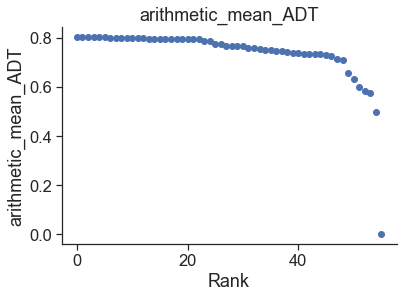

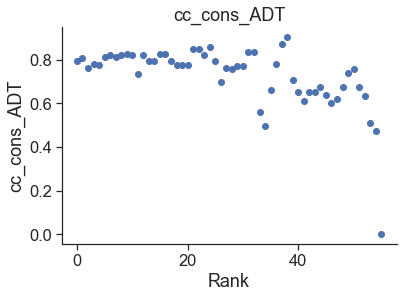

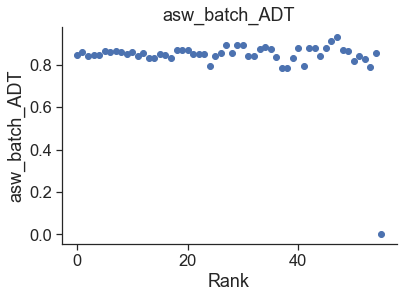

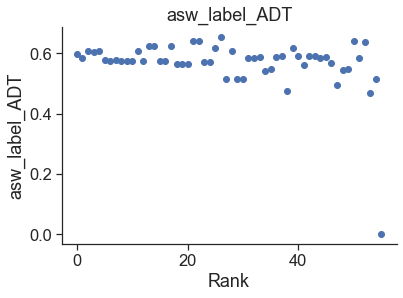

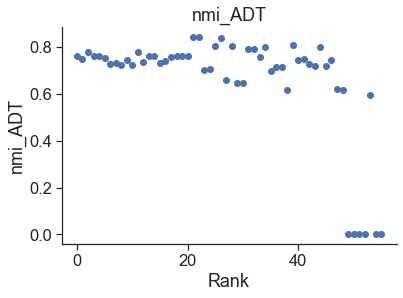

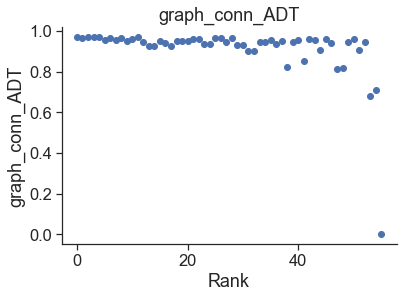

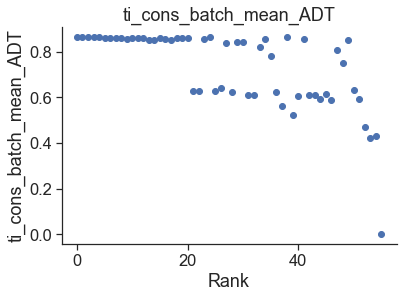

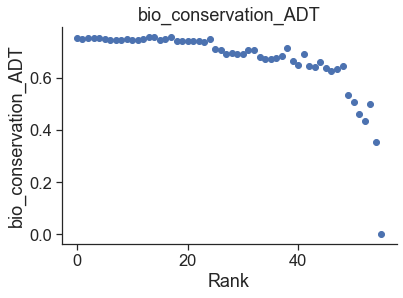

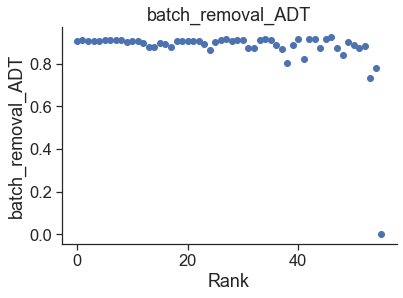

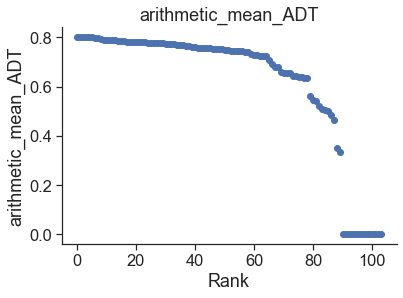

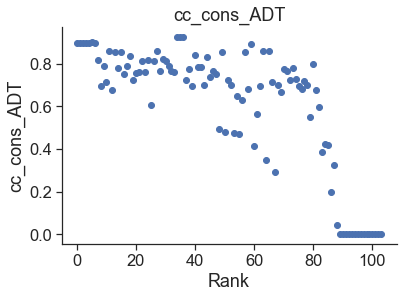

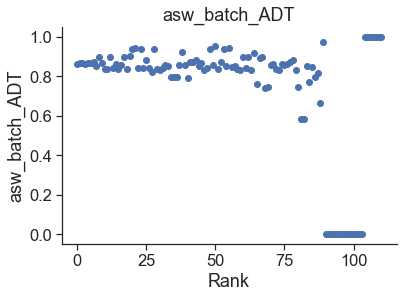

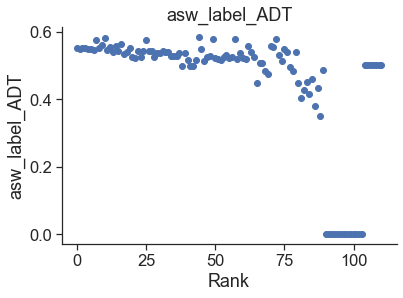

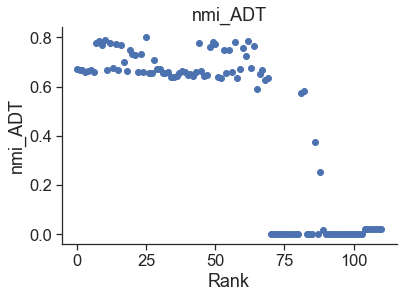

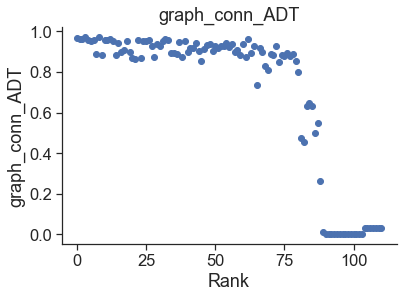

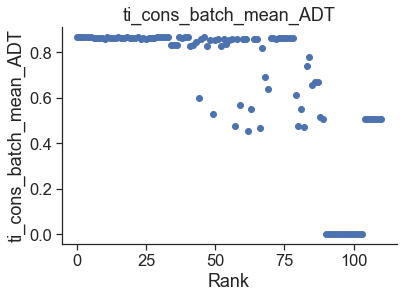

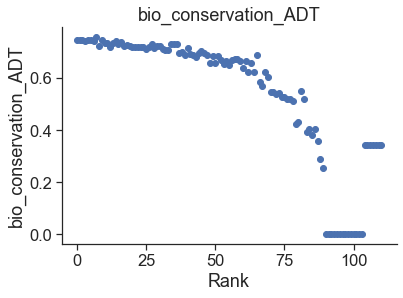

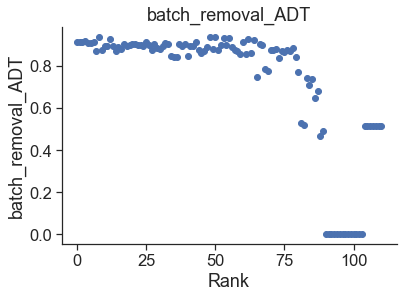

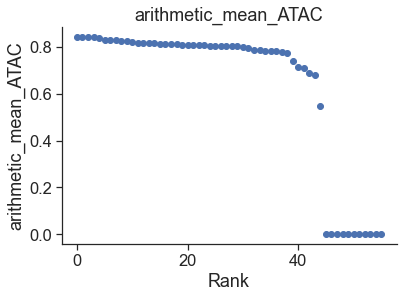

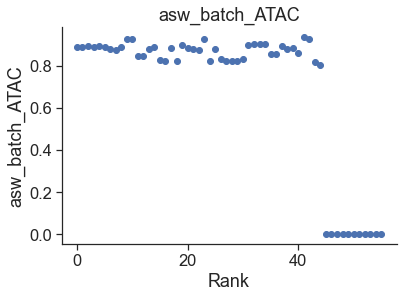

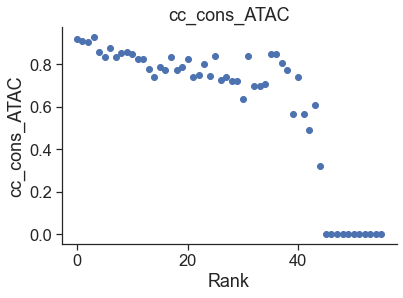

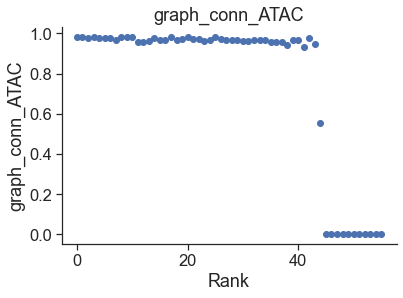

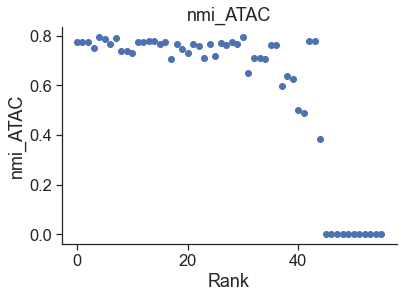

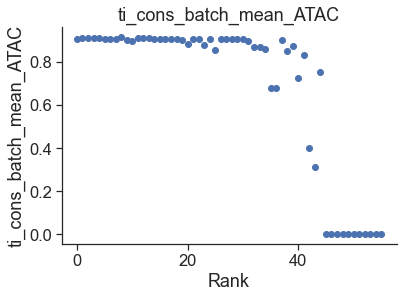

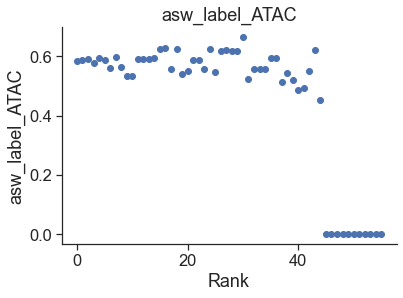

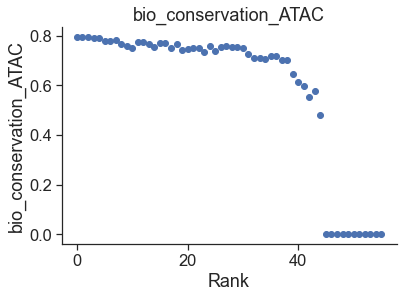

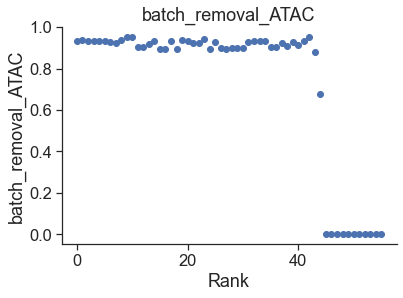

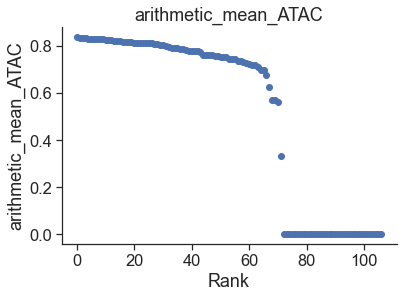

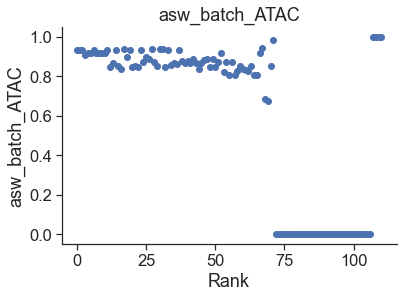

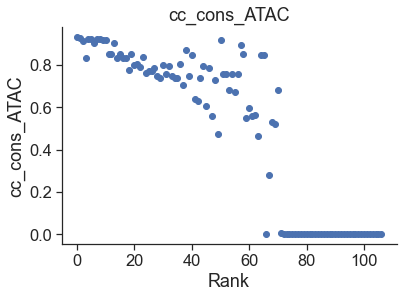

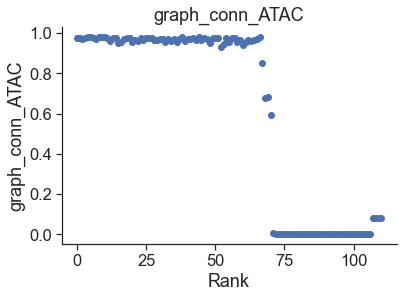

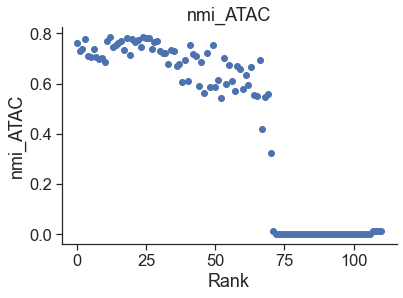

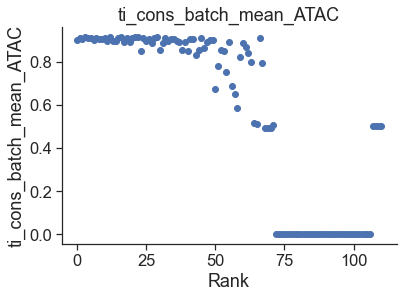

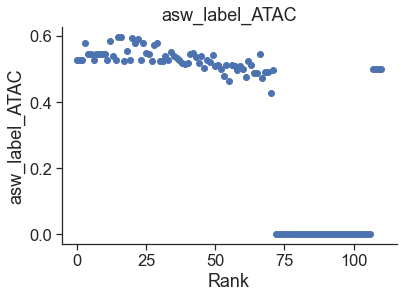

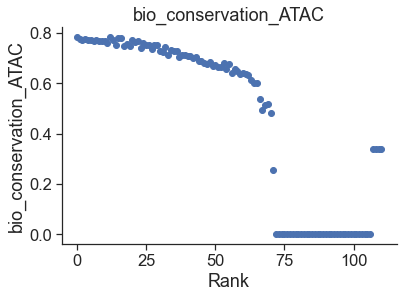

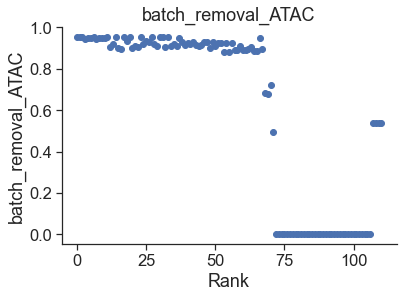

In [35]:
for cat in categories:
    for t in model_type:
        
        subs_type = t3_submissions.loc[t3_submissions.type==t].copy()
        subs_type_mod_sorted = subs_type.sort_values(by='arithmetic_mean_'+cat, ascending=False)
        
        noPlot_metric = [c for c in categories if c != cat]
        plot_metrics = []
        for m in all_metrics:
            if not noPlot_metric[0] in m:
                plot_metrics.append(m)
        
        for col in plot_metrics:
            
            plt.figure()
            plot_scores(subs_type_mod_sorted, col)
            
            plt.title(col)
            
            plt.savefig('figures/metric_plots/'+t+'_'+cat+'_'+col+'.pdf', bbox_inches='tight')
            plt.show()
            
        

In [37]:
subs_type_mod_sorted

id             Team Name        type                Team Members  \
0    171079.0               Amateur  pretrained            AliceAlice,Kimmo   
1    170804.0               Amateur  pretrained            AliceAlice,Kimmo   
2    171080.0               Amateur  pretrained            AliceAlice,Kimmo   
3    170936.0               Amateur  pretrained            AliceAlice,Kimmo   
5    169995.0                 S_lab  pretrained                        doge   
11   171083.0               Amateur  pretrained            AliceAlice,Kimmo   
16   170395.0               Amateur  pretrained            AliceAlice,Kimmo   
17   170582.0               Amateur  pretrained            AliceAlice,Kimmo   
21   170577.0               Amateur  pretrained            AliceAlice,Kimmo   
22   170749.0                 balia  pretrained             gr8joo,sungyoon   
26   170627.0                 balia  pretrained             gr8joo,sungyoon   
27   171454.0            TeamRegGen  pretrained                  TeamRegGen   
28   170400.0            TeamRegGen  pretrained                  TeamRegGen   
30   170562.0               Amateur  pretrained            AliceAlice,Kimmo   
34   170419.0               Amateur  pretrained            AliceAlice,Kimmo   
38   170078.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
39   169873.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
44   169774.0                 balia  pretrained             gr8joo,sungyoon   
45   170093.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
46   171072.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
47   169251.0                 S_lab  pretrained                        doge   
49   170622.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
50   170707.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
52   170802.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
53   169970.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
54   169807.0               Amateur  pretrained            AliceAlice,Kimmo   
56   170403.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
57   170116.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
59   170302.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
60   170354.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
61   169694.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
64   169870.0                 S_lab  pretrained                        doge   
70   170411.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
72   170468.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
73   170412.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
74   170393.0            TeamRegGen  pretrained                  TeamRegGen   
75   170404.0            TeamRegGen  pretrained                  TeamRegGen   
80   169920.0                 S_lab  pretrained                        doge   
82   170801.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
95   171066.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
103  170689.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
105  171084.0  Collab at AskExplain  pretrained           DavidB_AskExplain   
108  170511.0                  GLUE  pretrained  xiachenrui,caozj,just_fine   
109  169720.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
115  168939.0  BIMSB Bioinformatics  pretrained                  wkopp,jona   
117  169690.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
118  169653.0          LiuZ_Lab_BCM  pretrained                ChaozhongLiu   
119  168961.0                 S_lab  pretrained                        doge   
120  169082.0                 S_lab  pretrained                        doge   
121  168435.0               Amateur  pretrained            Al

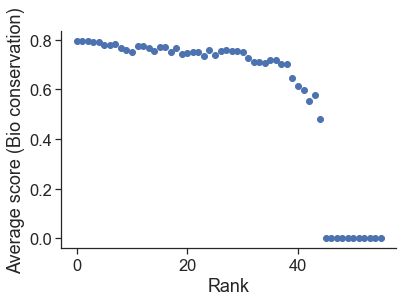

<Figure size 432x288 with 0 Axes>

In [38]:
# plot individual ones
cat = 'ATAC'
t = 'pretrained'
score = 'bio_conservation_ATAC'

subs_type = t3_submissions.loc[t3_submissions.type==t].copy()
subs_type_mod_sorted = subs_type.sort_values(by='arithmetic_mean_'+cat, ascending=False)

plt.scatter([i for i in range(subs_type_mod_sorted.shape[0])], subs_type_mod_sorted[score])
plt.title('')
plt.xlabel('Rank')
plt.ylabel('Average score (Bio conservation)')

plt.show()
plt.savefig('figures/metric_plots/'+t+'_'+cat+'_'+score+'_manual.pdf')


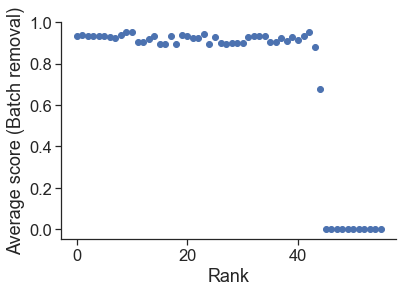

In [40]:
# plot individual ones
cat = 'ATAC'
t = 'pretrained'
score = 'batch_removal_ATAC'

subs_type = t3_submissions.loc[t3_submissions.type==t].copy()
subs_type_mod_sorted = subs_type.sort_values(by='arithmetic_mean_'+cat, ascending=False)

plt.scatter([i for i in range(subs_type_mod_sorted.shape[0])], subs_type_mod_sorted[score])
plt.title('')
plt.xlabel('Rank')
plt.ylabel('Average score (Batch removal)')

plt.savefig('figures/metric_plots/'+t+'_'+cat+'_'+score+'_manual.pdf')

# Overall Survey insights

In [41]:
survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info'],
      dtype='object')

## SC analysis toolkit

In [42]:
survey_results['SC analysis toolkit'].value_counts()

Scanpy                                                                             16
None                                                                               11
Seurat, Scanpy, Bioconductor, magic-impute; anndata                                 1
Scanpy, scvi                                                                        1
Generalised Canonical Procrustes (gcproc): https://github.com/AskExplain/gcproc     1
SIMBA https://simba-bio.readthedocs.io                                              1
Seurat, Scanpy, Bioconductor                                                        1
Scanpy, scvi-tools                                                                  1
Seurat, Bioconductor                                                                1
Seurat, Scanpy, scVI                                                                1
Name: SC analysis toolkit, dtype: int64

In [43]:
toolkit_fix_dict = {
    
    'Scanpy':'Scanpy',
    'None':'None',
    'Seurat, Scanpy, Bioconductor, magic-impute; anndata':'Multiple toolkits',
    'Seurat, Scanpy, Bioconductor':'Multiple toolkits',
    'Scanpy, scvi':'Multiple toolkits',
    'Generalised Canonical Procrustes (gcproc): https://github.com/AskExplain/gcproc':'Multiple toolkits',
    'SIMBA https://simba-bio.readthedocs.io':'Multiple toolkits',
    'Bioconductor':'Multiple toolkits',
    'Scanpy, scvi-tools':'Multiple toolkits',
    'Seurat, Bioconductor':'Multiple toolkits',
    'Seurat, Scanpy, scVI':'Multiple toolkits'
    #Mixture of Seurat, Scanpy, Bioconductor, scvi-tools, SIMBA, gcproc

}

In [44]:
survey_results['SC_toolkit_fix'] = survey_results['SC analysis toolkit'].map(toolkit_fix_dict)

In [45]:
sc_tk = survey_results['SC_toolkit_fix'].value_counts()

In [46]:
survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'SC_toolkit_fix'],
      dtype='object')

In [47]:
pd.crosstab(survey_results['SC_toolkit_fix'], survey_results['Survey task'])

Survey task        Task 1 - Predict Modality  Task 2 - Match Modality  \
SC_toolkit_fix                                                          
Multiple toolkits                          3                        1   
None                                       7                        2   
Scanpy                                     7                        5   

Survey task        Task 3 - Joint Embedding  
SC_toolkit_fix                               
Multiple toolkits                         4  
None                                      2  
Scanpy                                    4

In [48]:
survey_results['Team'].value_counts()

Novel                    2
Guanlab-dengkw           2
Walther                  1
AXX                      1
SysMo                    1
FinPak                   1
balia                    1
DANCE                    1
AIBS                     1
Cajal                    1
CellMates                1
MIM UW                   1
TeamRegGen               1
GLUE                     1
KhrameevaLab             1
QCM1                     1
SIMBA                    1
BIOCL                    1
AskExplain               1
LiuZ_Lab_BCM             1
mikephn                  1
scJoint                  1
RoyalNeverGiveup         1
scFEI                    1
Liuzlab_ww               1
LS_Lab                   1
Living-Systems-Lab       1
Amateur                  1
SCEMMAPDTHCOFF           1
LiuZLab3                 1
MahfouzLab               1
gene-gnome               1
System Genomics - UEF    1
Name: Team, dtype: int64

In [49]:
sc_tk

Scanpy               16
None                 11
Multiple toolkits     8
Name: SC_toolkit_fix, dtype: int64

In [50]:
for k in list(sc_tk.keys()):
    print(k, round( (sc_tk[k] / sum(sc_tk.values)), 3 ))

Scanpy 0.457
None 0.314
Multiple toolkits 0.229


In [51]:
plot_df = pd.DataFrame(columns=['Toolkit', 'Used'])

In [52]:
plot_df['Toolkit'] = list(sc_tk.keys())
plot_df['Used'] = list(round( (sc_tk / sum(sc_tk.values)), 3 ))

<Figure size 432x288 with 0 Axes>

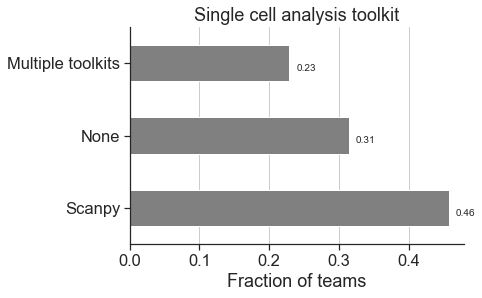

In [53]:
plt.figure()

bp = plot_df.plot.barh(x='Toolkit', y='Used', color='grey', legend=None)

plt.xlabel('Fraction of teams')
plt.ylabel('')

plt.title('Single cell analysis toolkit')

plt.grid(axis='x')

for y, x in enumerate(plot_df.Used):
    plt.text(x=x+0.01, y=y-0.1, s=round(x,2))


plt.savefig('figures/sc_toolskit.pdf', bbox_inches='tight')

plt.show()

In [54]:
# 10 percent also Seurat and otherwise mixture of Seurat, Scanpy, Bioconductor, scvi-tools, SIMBA, gcproc

## Public data usage

In [55]:
survey_results['Public data usage'].value_counts()

No                               26
Yes, for pretraining & more       5
Yes, but only for prototyping     4
Name: Public data usage, dtype: int64

## Deep learning framework

In [56]:
dl_fr = survey_results['Deep learning framework'].value_counts()

for k in list(dl_fr.keys()):
    print(k, round( (dl_fr[k] / sum(dl_fr.values)), 3 ))

PyTorch 0.514
I did not use a neural network 0.229
Tensorflow 0.229
scikit learn 0.029


In [57]:
plot_df = pd.DataFrame(columns=['DL framwork', 'Used'])

In [58]:
plot_df['DL framwork'] = list(dl_fr.keys())
plot_df['Used'] = list(round( (dl_fr / sum(dl_fr.values)), 3 ))

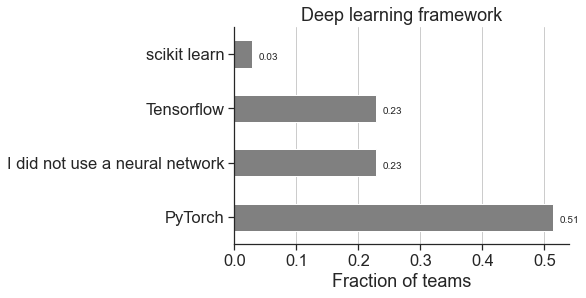

In [59]:
plot_df.plot.barh(x='DL framwork', y='Used',color='grey', legend=None)
plt.xlabel('Fraction of teams')
plt.ylabel('')

plt.title('Deep learning framework')

plt.grid(axis='x')

for y, x in enumerate(plot_df.Used):
    plt.text(x=x+0.01, y=y-0.1, s=round(x,2))
    
plt.savefig('figures/dl_frame.pdf', bbox_inches='tight')

plt.show()

# Task1: Survey insights

## Team ranking

In [60]:
# group submissions by team, take to top submission and get rank

t1_team_ranks = t1_submissions.sort_values('Overall').groupby('Team Name').first().sort_values('Overall')
t1_team_ranks['rank'] = [i+1 for i in range(t1_team_ranks.shape[0])]
t1_rank_dict = dict(zip(list(t1_team_ranks.index), t1_team_ranks['rank']))

t1_team_ranks_Overall = t1_submissions.sort_values('Overall').groupby('Team Name').first().sort_values('Overall')
t1_team_ranks_Overall['rank'] = [i+1 for i in range(t1_team_ranks_Overall.shape[0])]
t1_rank_dict_Overall = dict(zip(list(t1_team_ranks_Overall.index), t1_team_ranks_Overall['rank']))

t1_team_ranks_ADT2GEX = t1_submissions.sort_values('ADT2GEX').groupby('Team Name').first().sort_values('ADT2GEX')
t1_team_ranks_ADT2GEX['rank_ADT2GEX'] = [i+1 for i in range(t1_team_ranks_ADT2GEX.shape[0])]
t1_rank_dict_ADT2GEX = dict(zip(list(t1_team_ranks_ADT2GEX.index), t1_team_ranks_ADT2GEX['rank_ADT2GEX']))

t1_team_ranks_GEX2ATAC = t1_submissions.sort_values('GEX2ATAC').groupby('Team Name').first().sort_values('GEX2ATAC')
t1_team_ranks_GEX2ATAC['rank_GEX2ATAC'] = [i+1 for i in range(t1_team_ranks_GEX2ATAC.shape[0])]
t1_rank_dict_GEX2ATAC = dict(zip(list(t1_team_ranks_GEX2ATAC.index), t1_team_ranks_GEX2ATAC['rank_GEX2ATAC']))

t1_team_ranks_ATAC2GEX = t1_submissions.sort_values('ATAC2GEX').groupby('Team Name').first().sort_values('ATAC2GEX')
t1_team_ranks_ATAC2GEX['rank_ATAC2GEX'] = [i+1 for i in range(t1_team_ranks_ATAC2GEX.shape[0])]
t1_rank_dict_ATAC2GEX = dict(zip(list(t1_team_ranks_ATAC2GEX.index), t1_team_ranks_ATAC2GEX['rank_ATAC2GEX']))

t1_team_ranks_GEX2ADT = t1_submissions.sort_values('GEX2ADT').groupby('Team Name').first().sort_values('GEX2ADT')
t1_team_ranks_GEX2ADT['rank_GEX2ADT'] = [i+1 for i in range(t1_team_ranks_GEX2ADT.shape[0])]
t1_rank_dict_GEX2ADT = dict(zip(list(t1_team_ranks_GEX2ADT.index), t1_team_ranks_GEX2ADT['rank_GEX2ADT']))

t1_team_ranks['top10'] = ['top10' for i in range(10)]+['other' for i in range(10,(t1_team_ranks.shape[0]))]

#t1_top10_dict = dict(zip(list(t1_team_ranks.index), t1_team_ranks['top10']))

t1_rank_dict_GEX2ADT

{'Guanlab-dengkw': 1,
 'DSE': 2,
 'scJoint': 3,
 'AXX': 4,
 'MIM UW': 5,
 'LS_lab': 6,
 'scFEI': 7,
 'Transbio_NB': 8,
 'RoyalNeverGiveup': 9,
 'WgLab': 10,
 'GALIXIR_SYSU': 11,
 'Novel': 12,
 'GoLAKERS': 13,
 'KhrameevaLab': 14,
 'mikephn': 15,
 'KitchenSink': 16,
 'DP': 17,
 'MahfouzLab': 18,
 'balia': 19,
 'GLUE': 20,
 'teamupupup': 21,
 'Cajal': 22,
 'QCM1': 23,
 'Liuzlab_ww': 24,
 'System Genomics - UEF': 25,
 'what': 26,
 'SCEMMAPDTHCOFF': 27,
 'keep it simple': 28,
 'BCM-QCBs': 29,
 'CellMates': 30,
 'FubukiDAO': 31,
 'Starterkit_test': 32,
 'LiuZLab3': 33,
 'JoinedLastMInuteLOL': 34,
 'lc': 35,
 'GarryLab': 36,
 'Maxwell': 37,
 'Amateur': 38,
 'BCM-QCB-Ruth': 39,
 'Walther': 40,
 'torch_nn': 41,
 'ob1a': 42,
 'c_team': 43,
 'tang27abu': 44,
 'CW': 45,
 'gene-gnome': 46,
 'willM': 47}

In [61]:
len(list(t1_team_ranks.keys()))

27

In [62]:
def fix_dict(d, old_key, new_key):
    d[new_key] = d[old_key]
    del d[old_key]
    return(d)
    

In [63]:
# Fix dict entries

for d in [t1_rank_dict, t1_rank_dict_ADT2GEX, t1_rank_dict_GEX2ATAC, t1_rank_dict_ATAC2GEX, t1_rank_dict_GEX2ADT]:
    
    for old_name, new_name in zip(['LS_lab', 'DSE'], ['LS_Lab', 'DANCE']):
        
        d = fix_dict(d, old_name, new_name)
    

In [64]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT', 'Overall']

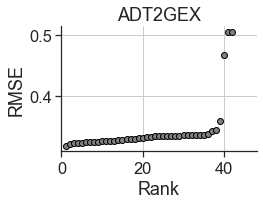

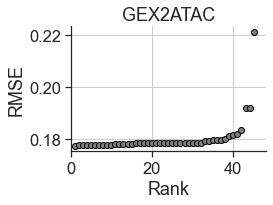

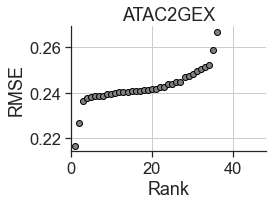

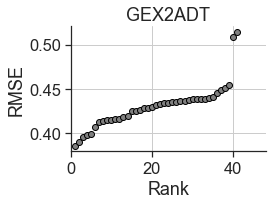

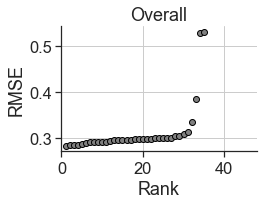

In [65]:
for subtask in subtask_list:
    
    rank_list = globals()['t1_team_ranks_'+subtask]
    
    vals = np.array(rank_list[subtask])
    vals = vals[vals<0.7]
    
    plt.figure(figsize=(3.5, 2.3))

    plt.scatter([i+1 for i in range(len(vals))], vals, c='grey', edgecolors='black')
    plt.grid()
    
    plt.xlim(0,48)
    
    plt.title(subtask)
    
    plt.ylabel('RMSE')
    plt.xlabel('Rank')
    #plt.axvline(x=9.5, c='black')

    #plt.xticks(rotation=90)
    #plt.savefig('figures/metric_by_rank_'+subtask+'.pdf', bbox_inches='tight')
    plt.savefig('figures/metric_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    
    plt.show()

In [66]:
for st in subtask_list:
    
    st_dict = globals()['t1_rank_dict_'+st]
    
    t1_survey_results['rank_'+st] = t1_survey_results['Team'].map(st_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/4046635336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['rank_'+st] = t1_survey_results['Team'].map(st_dict)
/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/4046635336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['rank_'+st] = t1_survey_results['Team'].map(st_dict)
/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/4046635336.py:5: SettingWithCopyWarning: 
A value

## Algorithm class

In [67]:
t1_survey_results['Algorithm class'].value_counts()

Deep neural network                                                                                      10
Linear / Logisitc / Kernel Regression                                                                     2
Decision tree (Random forest, XGBoost, etc.)                                                              1
Linear domain adaptation followed by KNN regression                                                       1
ensemble of kNN, each one used a different set of input features and training samples                     1
For GEX2ADT 5 fold ensemble of KNN Regressor. For ADT2GEX 5 fold ensemble of Catboost models and MLP.     1
KNN regression                                                                                            1
Name: Algorithm class, dtype: int64

In [68]:
algorithm_fix_dict = {
    
    'Deep neural network':'Deep neural network',
    'Linear / Logisitc / Kernel Regression':'Linear / Logisitc / Kernel / kNN Regression',
    'Decision tree (Random forest, XGBoost, etc.)':'Decision tree',
    'Linear domain adaptation followed by KNN regression':'Linear / Logisitc / Kernel / kNN Regression',
    'ensemble of kNN, each one used a different set of input features and training samples':'Linear / Logisitc / Kernel / kNN Regression',
    'Autoencoder':'Deep neural network',
    'For GEX2ADT 5 fold ensemble of KNN Regressor. For ADT2GEX 5 fold ensemble of Catboost models and MLP.':'Linear / Logisitc / Kernel / kNN Regression',
    'KNN regression':'Linear / Logisitc / Kernel / kNN Regression'
    
}

In [69]:
t1_survey_results['Algorithm class fixed'] = t1_survey_results['Algorithm class'].map(algorithm_fix_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/3354133618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['Algorithm class fixed'] = t1_survey_results['Algorithm class'].map(algorithm_fix_dict)


### Per subtask plots

In [70]:
classes = list(t1_survey_results['Algorithm class fixed'].unique())

In [71]:
classes

['Deep neural network',
 'Decision tree',
 'Linear / Logisitc / Kernel / kNN Regression']

In [72]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

In [74]:
#t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]

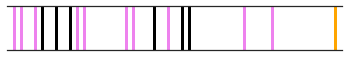

Deep neural network
P value (U-test): 0.536
Decision tree
P value (U-test): 0.118
Linear / Logisitc / Kernel / kNN Regression
P value (U-test): 0.961


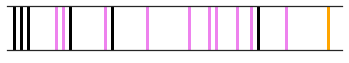

Deep neural network
P value (U-test): 0.315
Decision tree
P value (U-test): 0.118
Linear / Logisitc / Kernel / kNN Regression
P value (U-test): 0.062


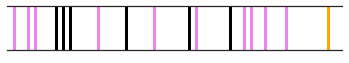

Deep neural network
P value (U-test): 0.962
Decision tree
P value (U-test): 0.118
Linear / Logisitc / Kernel / kNN Regression
P value (U-test): 0.404


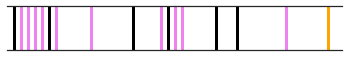

Deep neural network
P value (U-test): 0.364
Decision tree
P value (U-test): 0.118
Linear / Logisitc / Kernel / kNN Regression
P value (U-test): 0.884


In [75]:
for subtask in subtask_list:

    rank_list = globals()['t1_team_ranks_'+subtask]

    vals = np.array(rank_list[subtask])
    vals = vals[vals<0.7]

    plt.figure(figsize=(6, 0.8))

    #plt.title(subtask)

    #scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()
    
    col_list = ['violet', 'orange', 'black', 'blue', 'orange', 'yellow']
    col_list_red = col_list[:len(classes)]
    
    for feature,col in zip(classes, col_list_red):
        
        # feature of interest
        v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
        #kick categories with only one data point
        lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=3 ,label=feature)
        for x in v_coords_test[1:]:
            lines_test = plt.axvline(x, c=col,linewidth=3, alpha=1)

    # # feature of interest
    # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
    # for x in v_coords_test:
    #     lines_test = plt.axvline(x, c='r', alpha=1)
    # 
    # # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    # 
    #  # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    
    plt.xlim(0,48)

    #plt.ylabel('Model class')
    #plt.xlabel('Rank')

    plt.yticks([])
    plt.xticks([])

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    #plt.legend(title="Model class",loc='center left', bbox_to_anchor=(1, 0.5)) 

    #plt.xticks(rotation=90)
    #plt.savefig('figures/algo_class_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    plt.savefig('figures/algo_class_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()
    
    for feature in classes:
        
        v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
        v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
        
        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))
    
    

## Number of params

In [76]:
t1_survey_results['Param_num_only'] = [s.split('_')[0] for s in t1_survey_results['Number of parameters']]

t1_survey_results['Param_num_only'] = [np.nan if s=='NA' else int(s) for s in t1_survey_results['Param_num_only']]

t1_survey_results['Param_num_only'] = np.log10(t1_survey_results['Param_num_only'])

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/650242212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['Param_num_only'] = [s.split('_')[0] for s in t1_survey_results['Number of parameters']]
/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/650242212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['Param_num_only'] = [np.nan if s=='NA' else int(s) for s in t1_survey_results['Param_num_only']]
/var/folders/vx/p0kclf654ql9cy9txc6r

In [77]:
# sns.violinplot(x='top10', y='Param_num_only', data=t1_survey_results, saturation=0.5)
# sns.swarmplot(x='top10', y='Param_num_only', data=t1_survey_results, color="white",
#               edgecolor="black",linewidth=1, size=8)
# 
# plt.ylabel('log10(# parameters)')
# plt.xlabel('')
# 
# plt.show()

### Per subtask plots

In [78]:
t1_survey_results['rank_'+subtask]

0     40
2     46
3     18
4     33
9      6
10    24
11     7
14     3
20    12
21    23
26     5
27    30
28    22
30     2
35     4
36     1
38    25
Name: rank_GEX2ADT, dtype: int64

In [79]:
col_name = 'Param_num_only'

In [80]:
# optional: fix columns
# t1_survey_results[col_name+'_fixed'] = t1_survey_results['Algorithm class'].map(algorithm_fix_dict)

In [81]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

Linear / Logisitc / Kernel / kNN Regression


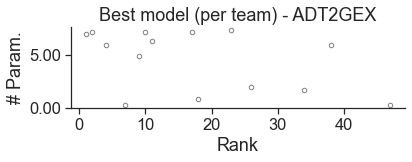

Linear / Logisitc / Kernel / kNN Regression


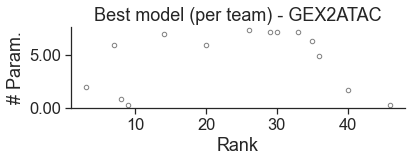

Linear / Logisitc / Kernel / kNN Regression


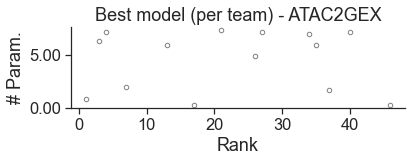

Linear / Logisitc / Kernel / kNN Regression


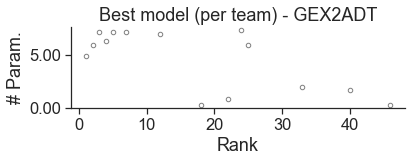

In [82]:
for subtask in subtask_list:

    rank_list = globals()['t1_team_ranks_'+subtask]

    #vals = np.array(rank_list[col_name])
    #vals = vals[vals<0.7]

    plt.figure(figsize=(6, 1.5))

    plt.title('Best model (per team) - '+subtask)

    scat_plot = plt.scatter(t1_survey_results['rank_'+subtask], t1_survey_results[col_name], c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()

   # # feature of interest
   # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
   # for x in v_coords_test:
   #     lines_test = plt.axvline(x, c='r', alpha=1)
   #
   # # all other features
   # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
   # for x in v_coords_contr:
   #     lines_contr = plt.axvline(x, c='b', alpha=1)
   #

    print(feature)
    #print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

    plt.ylabel('# Param.')
    plt.xlabel('Rank')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))


    # plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
    #           loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]

    #plt.xticks(rotation=90)
    plt.savefig('figures/param_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()

## Public data usage

In [83]:
col_name = 'Public data usage'
t1_survey_results[col_name].value_counts()

No                               12
Yes, for pretraining & more       3
Yes, but only for prototyping     2
Name: Public data usage, dtype: int64

In [84]:
classes = list(t1_survey_results[col_name].unique())
classes

['No', 'Yes, for pretraining & more', 'Yes, but only for prototyping']

In [85]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

No
P value (U-test): 0.328


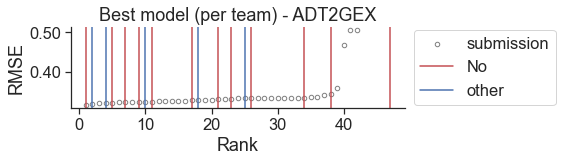

No
P value (U-test): 0.721


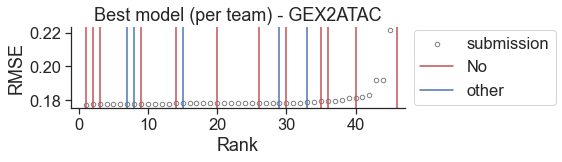

No
P value (U-test): 0.279


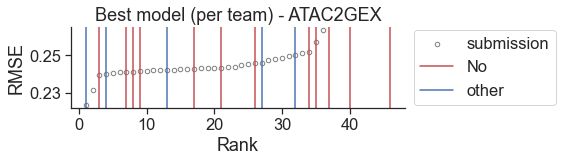

No
P value (U-test): 0.383


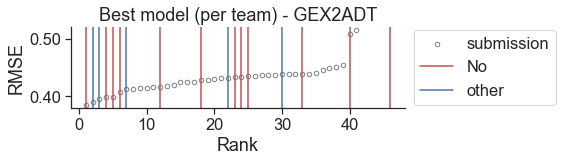

Yes, for pretraining & more
P value (U-test): 0.156


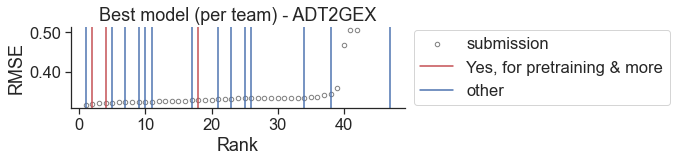

Yes, for pretraining & more
P value (U-test): 0.591


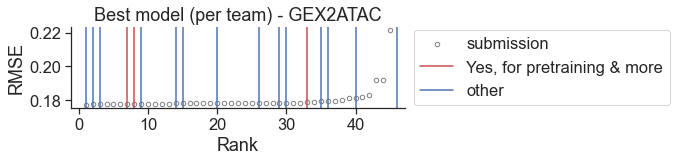

Yes, for pretraining & more
P value (U-test): 0.362


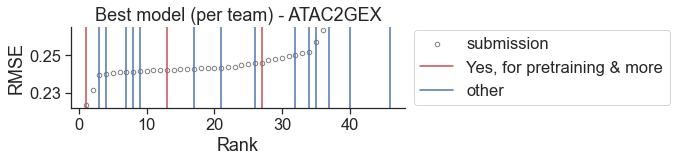

Yes, for pretraining & more
P value (U-test): 0.362


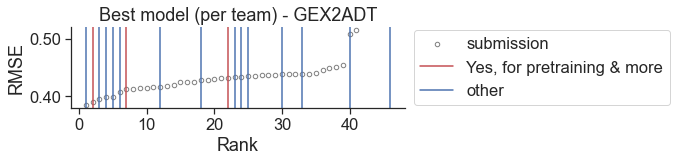

Yes, but only for prototyping
P value (U-test): 0.824


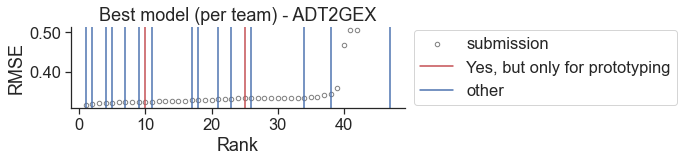

Yes, but only for prototyping
P value (U-test): 0.941


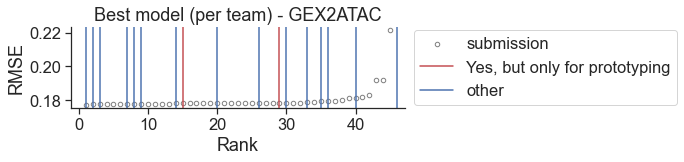

Yes, but only for prototyping
P value (U-test): 0.721


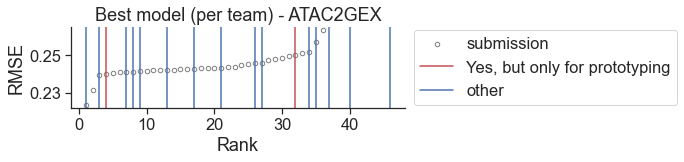

Yes, but only for prototyping
P value (U-test): 0.941


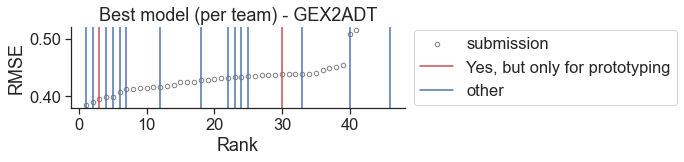

In [86]:
for feature in classes:

    for subtask in subtask_list:

        rank_list = globals()['t1_team_ranks_'+subtask]

        vals = np.array(rank_list[subtask])
        vals = vals[vals<0.7]

        plt.figure(figsize=(6, 1.5))

        plt.title('Best model (per team) - '+subtask)

        scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
        #plt.grid()

        # feature of interest
        v_coords_test = t1_survey_results.loc[t1_survey_results[col_name]==feature, 'rank_'+subtask]
        for x in v_coords_test:
            lines_test = plt.axvline(x, c='r', alpha=1)

        # all other features
        v_coords_contr = t1_survey_results.loc[t1_survey_results[col_name]!=feature, 'rank_'+subtask]
        for x in v_coords_contr:
            lines_contr = plt.axvline(x, c='b', alpha=1)

        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

        plt.ylabel('RMSE')
        plt.xlabel('Rank')
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        
        
        plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
                  loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]
        
        #plt.xticks(rotation=90)
        plt.savefig('figures/pub_data_by_rank_'+subtask+'.pdf', bbox_inches='tight')

        plt.show()

## Dim reduction approach

In [89]:
t1_survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_ADT2GEX', 'rank_GEX2ATAC', 'rank_ATAC2GEX', 'rank_GEX2ADT',
       'rank_Overall', 'Algorithm class fixed', 'Param_num_only'],
      dtype='object')

In [90]:
# get all possible values

all_vals = t1_survey_results['Dim reduction approach']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [91]:
all_vals

['LSI',
 'Deep autoencoders',
 'Principal Component Analysis (PCA)',
 'Truncated SVD',
 'truncated Single Vector Decomposition (SVD)',
 'Uniform Manifold Approximation and Projection (UMAP)',
 'Multi-Dimensional Scaling (MDS)',
 'None']

In [92]:
dim_red_fix_dict = {
    
    'Truncated SVD':'Trunc. SVD',
    'LSI':'LSI',
    'None':'None',
    'Multi-Dimensional Scaling (MDS)':'MDS',
    'truncated Single Vector Decomposition (SVD)':'Trunc. SVD',
    'Uniform Manifold Approximation and Projection (UMAP)':'UMAP',
    'Principal Component Analysis (PCA)':'PCA',
    'Deep autoencoders':'AE'
    
}

In [93]:
fixed_col = []

for s in t1_survey_results['Dim reduction approach']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t1_survey_results['Dim_red_fixed'] = fixed_col

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/2356641490.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['Dim_red_fixed'] = fixed_col


In [94]:
t1_survey_results['Dim_red_fixed']

0                 [PCA]
2                [None]
3           [PCA, UMAP]
4                 [PCA]
9                 [PCA]
10                [PCA]
11      [PCA, UMAP, AE]
14            [PCA, AE]
20                [LSI]
21    [PCA, Trunc. SVD]
26                 [AE]
27                [PCA]
28               [None]
30            [PCA, AE]
35                [PCA]
36    [PCA, Trunc. SVD]
38     [PCA, MDS, UMAP]
Name: Dim_red_fixed, dtype: object

### Per subtask

In [95]:
col_name = 'Dim_red_fixed'
t1_survey_results[col_name].value_counts()

[PCA]                6
[None]               2
[PCA, AE]            2
[PCA, Trunc. SVD]    2
[PCA, UMAP]          1
[PCA, UMAP, AE]      1
[LSI]                1
[AE]                 1
[PCA, MDS, UMAP]     1
Name: Dim_red_fixed, dtype: int64

In [96]:
classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes

['UMAP', 'LSI', 'MDS', 'PCA', 'AE', 'Trunc. SVD', 'None']

In [97]:
for feature in classes:
    
    print([feature in el for el in t1_survey_results[col_name]])
    

[False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True]
[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]
[True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, True, True]
[False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, False]
[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False]
[False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False]


In [98]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

UMAP
P value (U-test): 0.676


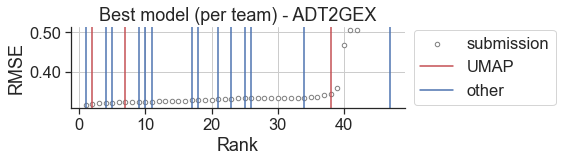

UMAP
P value (U-test): 0.953


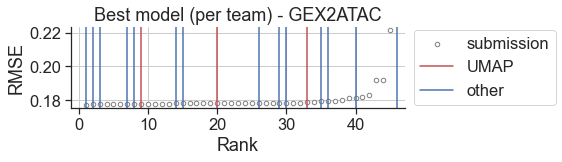

UMAP
P value (U-test): 0.509


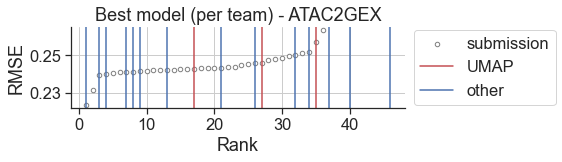

UMAP
P value (U-test): 0.859


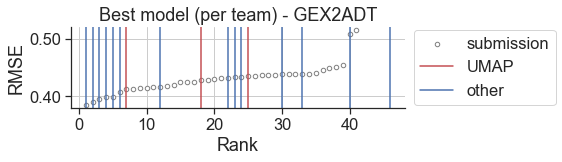

LSI
P value (U-test): 0.118


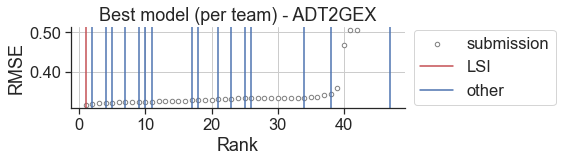

LSI
P value (U-test): 0.824


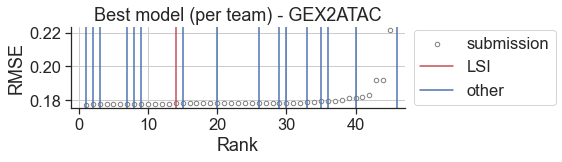

LSI
P value (U-test): 0.588


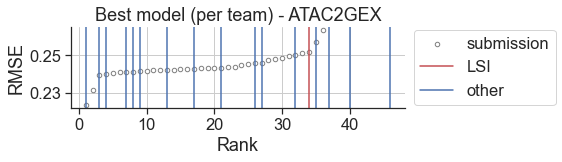

LSI
P value (U-test): 0.941


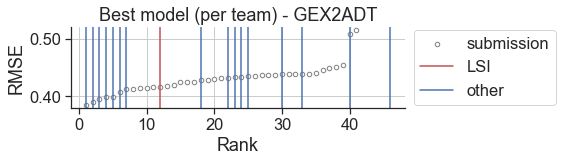

MDS
P value (U-test): 0.235


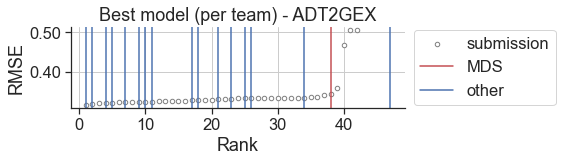

MDS
P value (U-test): 1.0


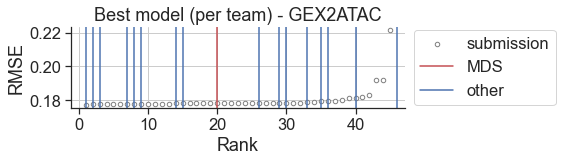

MDS
P value (U-test): 0.471


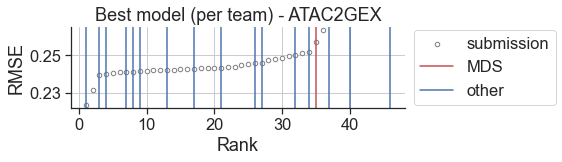

MDS
P value (U-test): 0.588


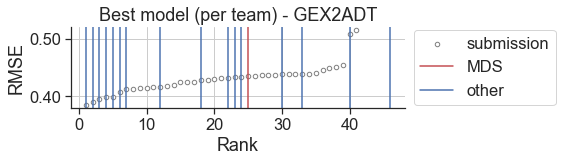

PCA
P value (U-test): 0.956


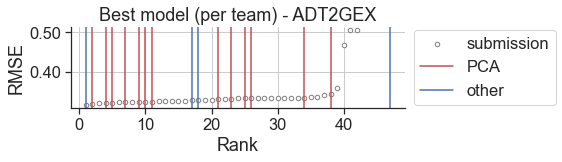

PCA
P value (U-test): 0.624


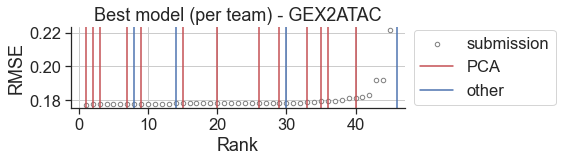

PCA
P value (U-test): 0.245


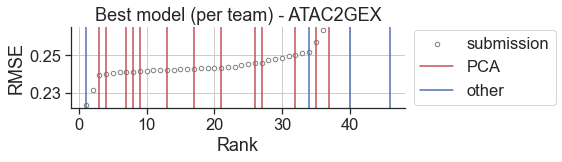

PCA
P value (U-test): 0.703


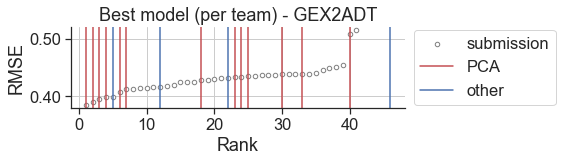

AE
P value (U-test): 0.102


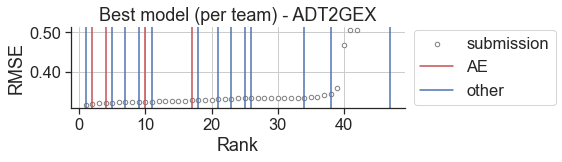

AE
P value (U-test): 0.703


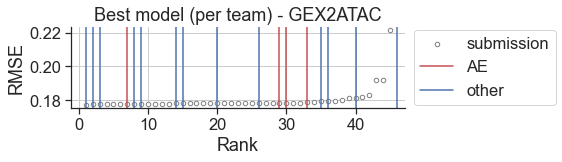

AE
P value (U-test): 0.956


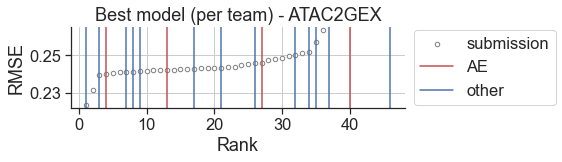

AE
P value (U-test): 0.032


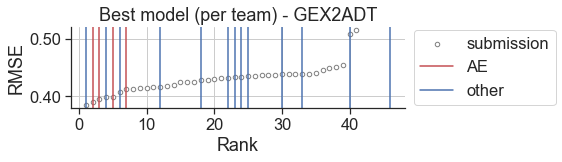

Trunc. SVD
P value (U-test): 0.941


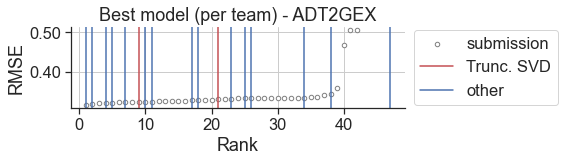

Trunc. SVD
P value (U-test): 0.941


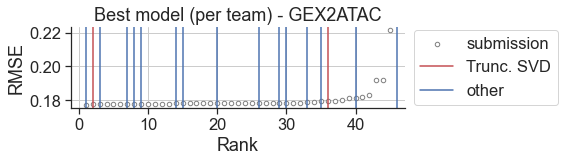

Trunc. SVD
P value (U-test): 0.721


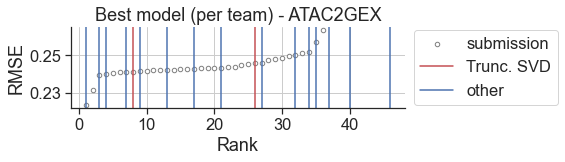

Trunc. SVD
P value (U-test): 0.441


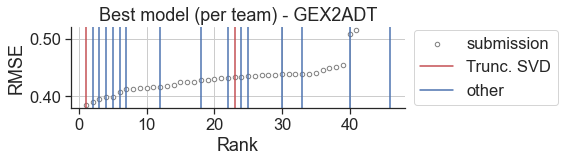

None
P value (U-test): 0.235


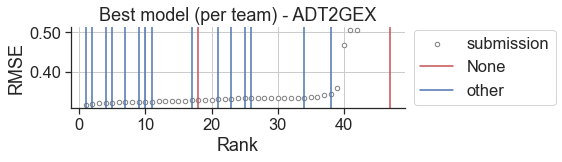

None
P value (U-test): 0.618


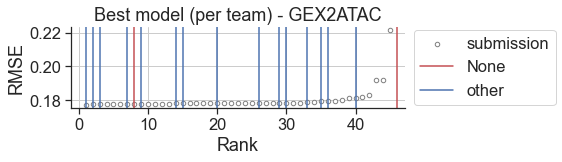

None
P value (U-test): 1.0


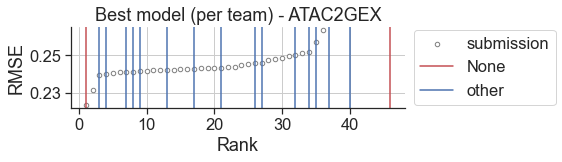

None
P value (U-test): 0.235


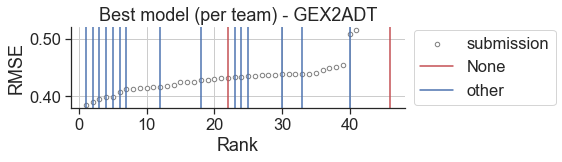

In [99]:
for feature in classes:

    for subtask in subtask_list:

        rank_list = globals()['t1_team_ranks_'+subtask]

        vals = np.array(rank_list[subtask])
        vals = vals[vals<0.7]

        plt.figure(figsize=(6, 1.5))

        plt.title('Best model (per team) - '+subtask)

        scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
        plt.grid()

        # feature of interest
        v_coords_test = t1_survey_results.loc[[feature in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        for x in v_coords_test:
            lines_test = plt.axvline(x, c='r', alpha=1)

        # all other features
        v_coords_contr = t1_survey_results.loc[[feature not in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        for x in v_coords_contr:
            lines_contr = plt.axvline(x, c='b', alpha=1)

        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

        plt.ylabel('RMSE')
        plt.xlabel('Rank')
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        
        
        plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
                  loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]
        
        #plt.xticks(rotation=90)
        plt.savefig('figures/dim_red_by_rank_'+subtask+'.pdf', bbox_inches='tight')

        plt.show()

## NN model architecture

In [100]:
t1_survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_ADT2GEX', 'rank_GEX2ATAC', 'rank_ATAC2GEX', 'rank_GEX2ADT',
       'rank_Overall', 'Algorithm class fixed', 'Param_num_only',
       'Dim_red_fixed'],
      dtype='object')

In [101]:
t1_survey_results['NN model architecture']

0                                                   MLP
2                        I did not use a neural network
3                        I did not use a neural network
4                        I did not use a neural network
9                                                   MLP
10                                          Transformer
11    MLP, Autoencoder, Variational Autoencoder, Tra...
14            MLP, Autoencoder, Variational Autoencoder
20                                          Autoencoder
21                       I did not use a neural network
26                              Variational Autoencoder
27                       I did not use a neural network
28                                                  MLP
30    MLP, Autoencoder, Variational Autoencoder, Gra...
35                                                  MLP
36                       I did not use a neural network
38                              Variational Autoencoder
Name: NN model architecture, dtype: object

In [102]:
# get all possible values

all_vals = t1_survey_results['NN model architecture']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [103]:
all_vals

['MLP',
 'Variational Autoencoder',
 'Autoencoder',
 'I did not use a neural network',
 'Graph NN',
 'Transformer']

In [104]:
dim_red_fix_dict = {
    
    'I did not use a neural network':'no NN used',
    'Graph NN':'Graph NN',
    'Variational Autoencoder':'VAE',
    'Autoencoder':'AE',
    'Transformer':'Transformer',
    'MLP':'MLP'
    
}

In [105]:
fixed_col = []

for s in t1_survey_results['NN model architecture']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t1_survey_results['NN_arch_fixed'] = fixed_col

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/3498024970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1_survey_results['NN_arch_fixed'] = fixed_col


In [106]:
t1_survey_results['NN_arch_fixed']

0                           [MLP]
2                    [no NN used]
3                    [no NN used]
4                    [no NN used]
9                           [MLP]
10                  [Transformer]
11    [MLP, AE, VAE, Transformer]
14                 [MLP, AE, VAE]
20                           [AE]
21                   [no NN used]
26                          [VAE]
27                   [no NN used]
28                          [MLP]
30       [MLP, AE, VAE, Graph NN]
35                          [MLP]
36                   [no NN used]
38                          [VAE]
Name: NN_arch_fixed, dtype: object

### Per subtask

In [107]:
col_name = 'NN_arch_fixed'
t1_survey_results[col_name].value_counts()

[no NN used]                   6
[MLP]                          4
[VAE]                          2
[Transformer]                  1
[MLP, AE, VAE, Transformer]    1
[MLP, AE, VAE]                 1
[AE]                           1
[MLP, AE, VAE, Graph NN]       1
Name: NN_arch_fixed, dtype: int64

In [108]:
classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes

['VAE', 'MLP', 'AE', 'no NN used', 'Graph NN', 'Transformer']

In [109]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

VAE
P value (U-test): 0.442


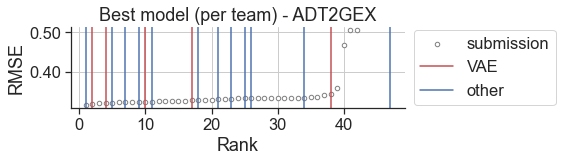

VAE
P value (U-test): 0.721


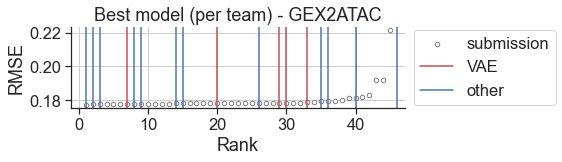

VAE
P value (U-test): 0.574


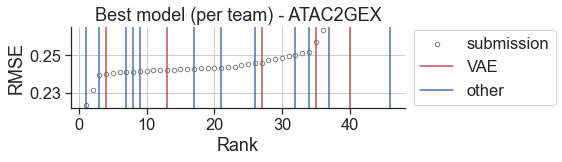

VAE
P value (U-test): 0.13


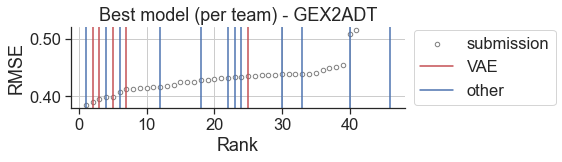

MLP
P value (U-test): 0.193


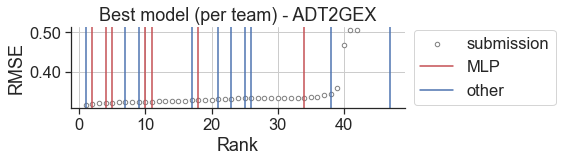

MLP
P value (U-test): 0.962


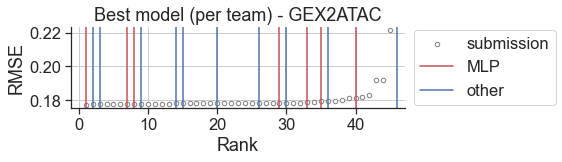

MLP
P value (U-test): 0.088


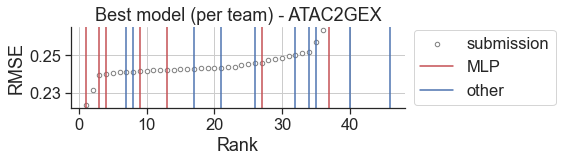

MLP
P value (U-test): 0.161


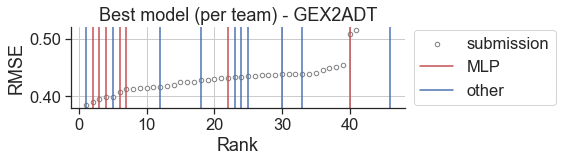

AE
P value (U-test): 0.006


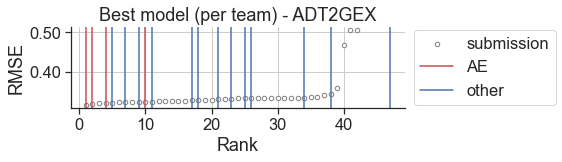

AE
P value (U-test): 0.956


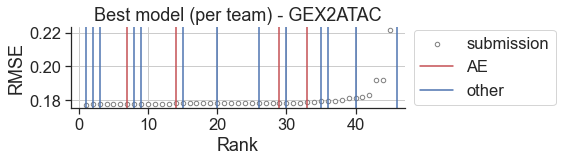

AE
P value (U-test): 0.871


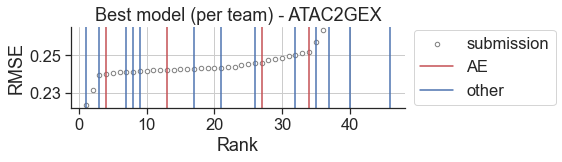

AE
P value (U-test): 0.079


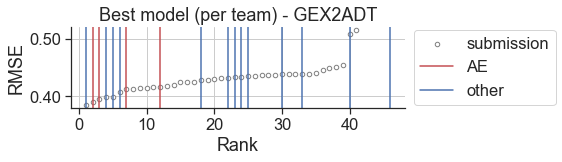

no NN used
P value (U-test): 0.256


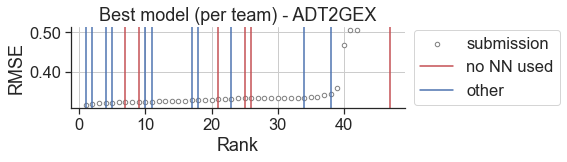

no NN used
P value (U-test): 0.808


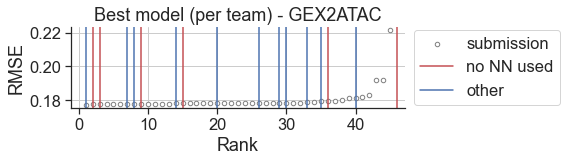

no NN used
P value (U-test): 0.884


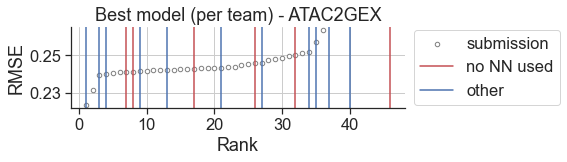

no NN used
P value (U-test): 0.216


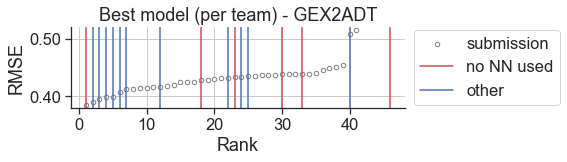

Graph NN
P value (U-test): 0.353


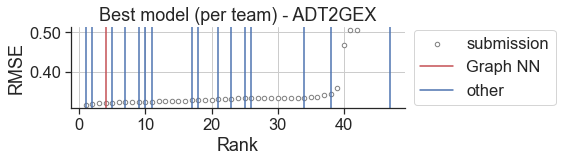

Graph NN
P value (U-test): 0.471


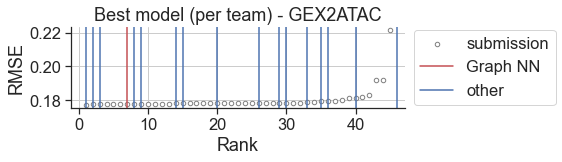

Graph NN
P value (U-test): 0.824


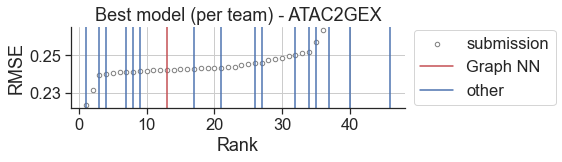

Graph NN
P value (U-test): 0.235


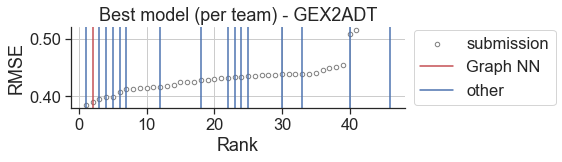

Transformer
P value (U-test): 0.618


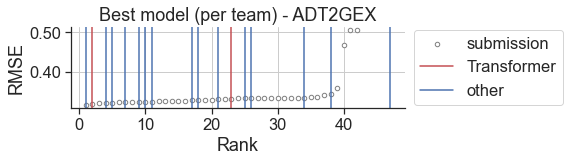

Transformer
P value (U-test): 0.529


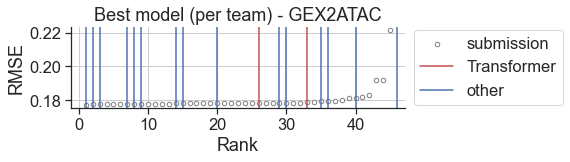

Transformer
P value (U-test): 0.824


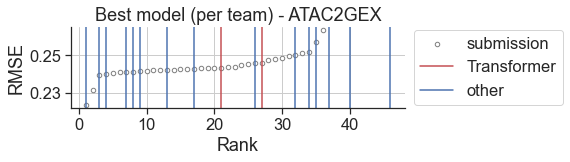

Transformer
P value (U-test): 0.941


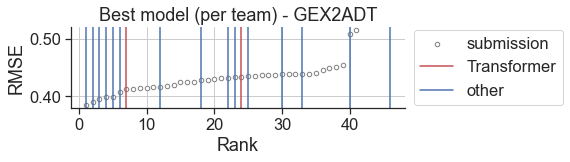

In [110]:
for feature in classes:

    for subtask in subtask_list:

        rank_list = globals()['t1_team_ranks_'+subtask]

        vals = np.array(rank_list[subtask])
        vals = vals[vals<0.7]

        plt.figure(figsize=(6, 1.5))

        plt.title('Best model (per team) - '+subtask)

        scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
        plt.grid()

        # feature of interest
        v_coords_test = t1_survey_results.loc[[feature in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        for x in v_coords_test:
            lines_test = plt.axvline(x, c='r', alpha=1)

        # all other features
        v_coords_contr = t1_survey_results.loc[[feature not in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        for x in v_coords_contr:
            lines_contr = plt.axvline(x, c='b', alpha=1)

        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

        plt.ylabel('RMSE')
        plt.xlabel('Rank')
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        
        
        plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
                  loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]
        
        #plt.xticks(rotation=90)
        plt.savefig('figures/NN_arch_by_rank_'+subtask+'.pdf', bbox_inches='tight')

        plt.show()

## Model depth

In [111]:
t1_survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_ADT2GEX', 'rank_GEX2ATAC', 'rank_ATAC2GEX', 'rank_GEX2ADT',
       'rank_Overall', 'Algorithm class fixed', 'Param_num_only',
       'Dim_red_fixed', 'NN_arch_fixed'],
      dtype='object')

In [112]:
t1_survey_results['Model depth']

0                 1-2 hidden layers
2     No hidden layers (no NN used)
3     No hidden layers (no NN used)
4     No hidden layers (no NN used)
9                 3-5 hidden layers
10                10+ hidden layers
11               5-10 hidden layers
14               5-10 hidden layers
20                3-5 hidden layers
21    No hidden layers (no NN used)
26                3-5 hidden layers
27    No hidden layers (no NN used)
28                3-5 hidden layers
30                3-5 hidden layers
35                3-5 hidden layers
36    No hidden layers (no NN used)
38                1-2 hidden layers
Name: Model depth, dtype: object

In [113]:
t1_survey_results['Model depth'].value_counts()

No hidden layers (no NN used)    6
3-5 hidden layers                6
1-2 hidden layers                2
5-10 hidden layers               2
10+ hidden layers                1
Name: Model depth, dtype: int64

### Per subtask

In [114]:
col_name = 'Model depth'
t1_survey_results[col_name].value_counts()

No hidden layers (no NN used)    6
3-5 hidden layers                6
1-2 hidden layers                2
5-10 hidden layers               2
10+ hidden layers                1
Name: Model depth, dtype: int64

In [115]:
#classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes = list(t1_survey_results[col_name].unique())
classes

['1-2 hidden layers',
 'No hidden layers (no NN used)',
 '3-5 hidden layers',
 '10+ hidden layers',
 '5-10 hidden layers']

In [116]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

1-2 hidden layers
P value (U-test): 0.059


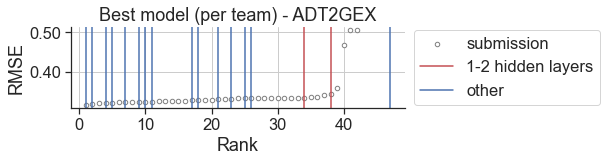

1-2 hidden layers
P value (U-test): 0.368


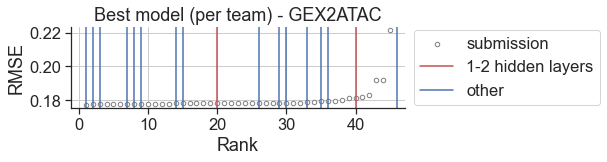

1-2 hidden layers
P value (U-test): 0.132


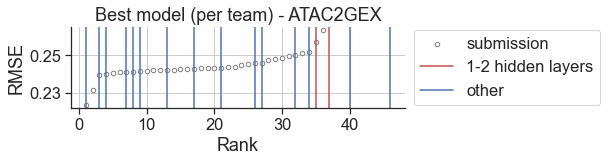

1-2 hidden layers
P value (U-test): 0.132


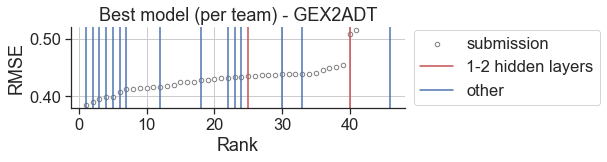

No hidden layers (no NN used)
P value (U-test): 0.256


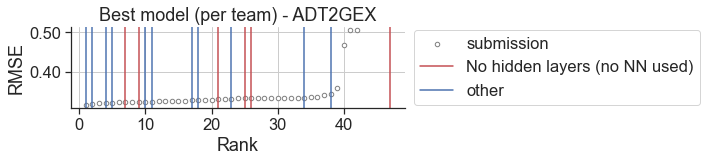

No hidden layers (no NN used)
P value (U-test): 0.808


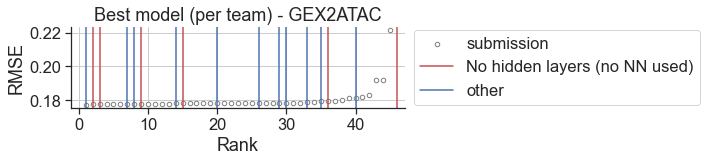

No hidden layers (no NN used)
P value (U-test): 0.884


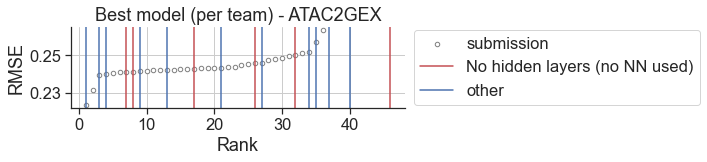

No hidden layers (no NN used)
P value (U-test): 0.216


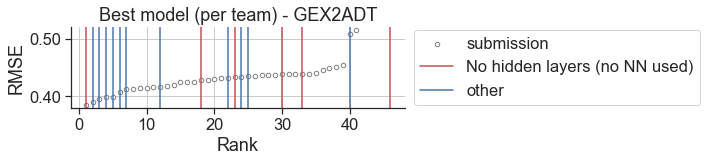

3-5 hidden layers
P value (U-test): 0.062


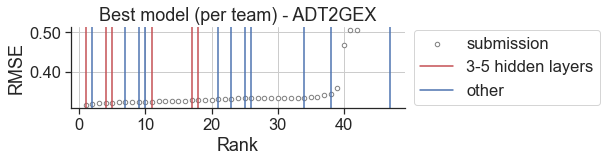

3-5 hidden layers
P value (U-test): 0.301


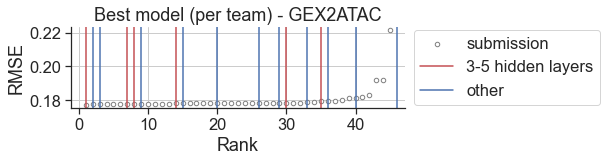

3-5 hidden layers
P value (U-test): 0.404


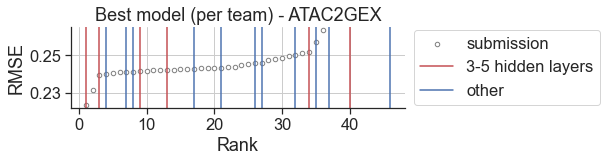

3-5 hidden layers
P value (U-test): 0.062


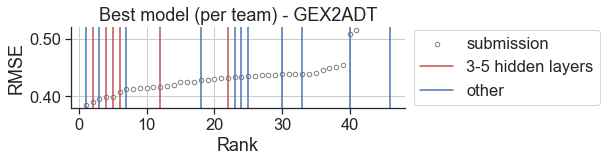

10+ hidden layers
P value (U-test): 0.706


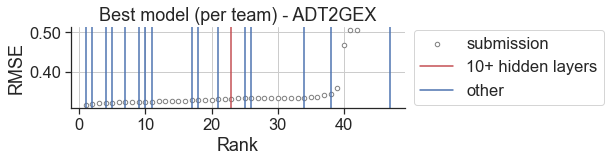

10+ hidden layers
P value (U-test): 0.941


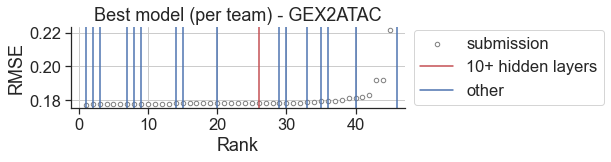

10+ hidden layers
P value (U-test): 1.0


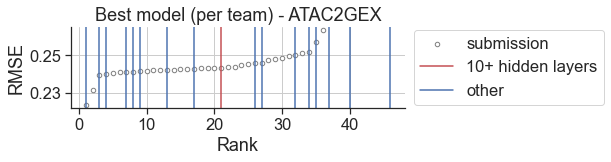

10+ hidden layers
P value (U-test): 0.706


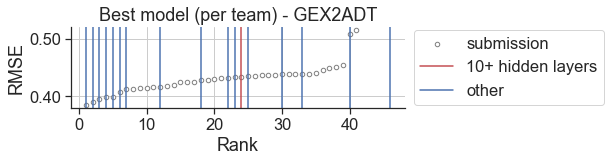

5-10 hidden layers
P value (U-test): 0.235


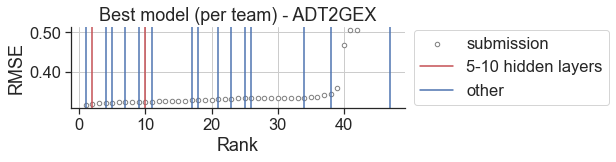

5-10 hidden layers
P value (U-test): 0.441


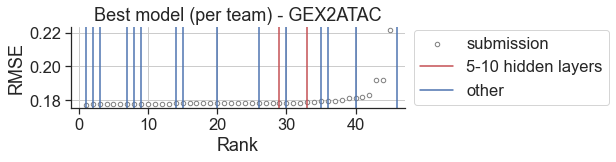

5-10 hidden layers
P value (U-test): 0.618


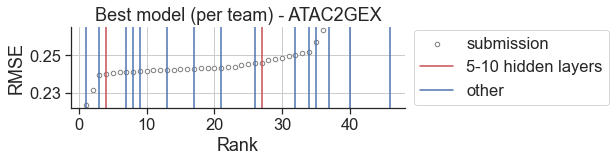

5-10 hidden layers
P value (U-test): 0.294


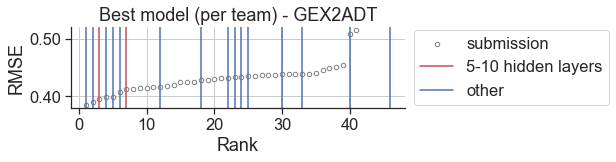

In [117]:
for feature in classes:

    for subtask in subtask_list:

        rank_list = globals()['t1_team_ranks_'+subtask]

        vals = np.array(rank_list[subtask])
        vals = vals[vals<0.7]

        plt.figure(figsize=(6, 1.5))

        plt.title('Best model (per team) - '+subtask)

        scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
        plt.grid()

        # feature of interest
        #v_coords_test = t1_survey_results.loc[[feature in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        v_coords_test = t1_survey_results.loc[t1_survey_results[col_name]==feature, 'rank_'+subtask]
        for x in v_coords_test:
            lines_test = plt.axvline(x, c='r', alpha=1)

        # all other features
        #v_coords_contr = t1_survey_results.loc[[feature not in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        v_coords_contr = t1_survey_results.loc[t1_survey_results[col_name]!=feature, 'rank_'+subtask]
        for x in v_coords_contr:
            lines_contr = plt.axvline(x, c='b', alpha=1)

        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

        plt.ylabel('RMSE')
        plt.xlabel('Rank')
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        
        
        plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
                  loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]
        
        #plt.xticks(rotation=90)
        plt.savefig('figures/depth_by_rank_'+subtask+'.pdf', bbox_inches='tight')

        plt.show()

In [118]:
classes = ['No hidden layers (no NN used)',
           '1-2 hidden layers',
           '3-5 hidden layers',
           '10+ hidden layers',
           '5-10 hidden layers']

In [119]:
# check color pallete for publication
sns.color_palette("YlOrRd", n_colors=4)

[(0.9976470588235294, 0.8823529411764706, 0.5286274509803922),
 (0.9952941176470589, 0.6690196078431372, 0.28549019607843135),
 (0.9890196078431372, 0.35529411764705887, 0.17882352941176471),
 (0.8305882352941176, 0.06117647058823529, 0.12549019607843137)]

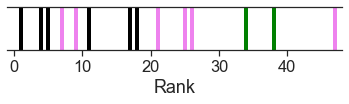

No hidden layers (no NN used)
P value (U-test): 0.256
1-2 hidden layers
P value (U-test): 0.059
3-5 hidden layers
P value (U-test): 0.062
10+ hidden layers
P value (U-test): 0.706
5-10 hidden layers
P value (U-test): 0.235


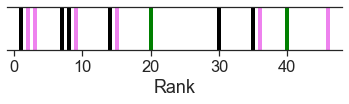

No hidden layers (no NN used)
P value (U-test): 0.808
1-2 hidden layers
P value (U-test): 0.368
3-5 hidden layers
P value (U-test): 0.301
10+ hidden layers
P value (U-test): 0.941
5-10 hidden layers
P value (U-test): 0.441


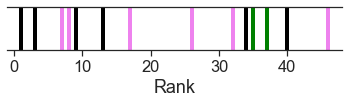

No hidden layers (no NN used)
P value (U-test): 0.884
1-2 hidden layers
P value (U-test): 0.132
3-5 hidden layers
P value (U-test): 0.404
10+ hidden layers
P value (U-test): 1.0
5-10 hidden layers
P value (U-test): 0.618


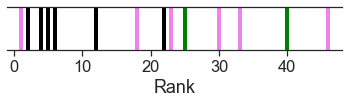

No hidden layers (no NN used)
P value (U-test): 0.216
1-2 hidden layers
P value (U-test): 0.132
3-5 hidden layers
P value (U-test): 0.062
10+ hidden layers
P value (U-test): 0.706
5-10 hidden layers
P value (U-test): 0.294


In [120]:
for subtask in subtask_list:

    rank_list = globals()['t1_team_ranks_'+subtask]

    vals = np.array(rank_list[subtask])
    vals = vals[vals<0.7]

    plt.figure(figsize=(6, 0.8))

    #plt.title(subtask)

    #scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()
    
    col_list = ['grey']+ list(sns.color_palette("YlOrRd", n_colors=len(classes)-1))
    #col_list_red = col_list[:len(classes)]
    
    for feature,col in zip(classes, col_list_red):
        
        # feature of interest
        v_coords_test = t1_survey_results.loc[t1_survey_results[col_name]==feature, 'rank_'+subtask]
        #kick categories with only one data point
        if len(v_coords_test)<=1:
            
            continue
        
        else:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=4, label=feature)
            for x in v_coords_test[1:]:
                lines_test = plt.axvline(x, c=col, alpha=1, linewidth=4)

    # # feature of interest
    # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
    # for x in v_coords_test:
    #     lines_test = plt.axvline(x, c='r', alpha=1)
    # 
    # # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    # 
    #  # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    
    plt.xlim(-1,48)

    #plt.ylabel('NN depth')
    plt.xlabel('Rank')

    plt.yticks([])
    #plt.xticks([])

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    #plt.legend(title="NN depth",loc='center left', bbox_to_anchor=(1, 0.5)) 

    #plt.xticks(rotation=90)
    #plt.savefig('figures/depth_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    plt.savefig('figures/depth_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()
    
    for feature in classes:
        
        v_coords_test = t1_survey_results.loc[t1_survey_results[col_name]==feature, 'rank_'+subtask]
        v_coords_contr = t1_survey_results.loc[t1_survey_results[col_name]!=feature, 'rank_'+subtask]
        
        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))
    
    

In [121]:
v_coords_contr

0     40
2     46
3     18
4     33
9      6
10    24
20    12
21    23
26     5
27    30
28    22
30     2
35     4
36     1
38    25
Name: rank_GEX2ADT, dtype: int64

## Variation in latent space

In [122]:
t1_survey_results.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_ADT2GEX', 'rank_GEX2ATAC', 'rank_ATAC2GEX', 'rank_GEX2ADT',
       'rank_Overall', 'Algorithm class fixed', 'Param_num_only',
       'Dim_red_fixed', 'NN_arch_fixed'],
      dtype='object')

In [123]:
t1_survey_results['Variation in latent space']

0                    Other: I didn't use a latent space
2                    Other: I didn't use a latent space
3     3: Linear dimensionality reduction, directly m...
4     3: Linear dimensionality reduction, directly m...
9     3: Linear dimensionality reduction, directly m...
10    3: Linear dimensionality reduction, directly m...
11    1: Non-linear combinations of all input featur...
14    1: Non-linear combinations of all input featur...
20    2: Non-linear combination of input features in...
21            4: Latent space is made of input features
26    1: Non-linear combinations of all input featur...
27                   Other: I didn't use a latent space
28    1: Non-linear combinations of all input featur...
30    1: Non-linear combinations of all input featur...
35    2: Non-linear combination of input features in...
36    3: Linear dimensionality reduction, directly m...
38    1: Non-linear combinations of all input featur...
Name: Variation in latent space, dtype: object

In [124]:
t1_survey_results['Variation in latent space'].value_counts()

1: Non-linear combinations of all input features in a deep architecture    6
3: Linear dimensionality reduction, directly mappable to input features    5
Other: I didn't use a latent space                                         3
2: Non-linear combination of input features in a shallow architecture      2
4: Latent space is made of input features                                  1
Name: Variation in latent space, dtype: int64

### Per subtask

In [125]:
col_name = 'Variation in latent space'
t1_survey_results[col_name].value_counts()

1: Non-linear combinations of all input features in a deep architecture    6
3: Linear dimensionality reduction, directly mappable to input features    5
Other: I didn't use a latent space                                         3
2: Non-linear combination of input features in a shallow architecture      2
4: Latent space is made of input features                                  1
Name: Variation in latent space, dtype: int64

In [126]:
#classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes = list(t1_survey_results[col_name].unique())
classes

["Other: I didn't use a latent space",
 '3: Linear dimensionality reduction, directly mappable to input features',
 '1: Non-linear combinations of all input features in a deep architecture',
 '2: Non-linear combination of input features in a shallow architecture',
 '4: Latent space is made of input features']

In [127]:
subtask_list = ['ADT2GEX', 'GEX2ATAC', 'ATAC2GEX', 'GEX2ADT']

Other: I didn't use a latent space
P value (U-test): 0.021


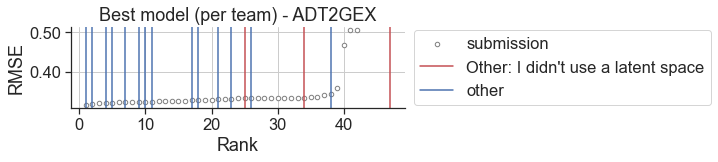

Other: I didn't use a latent space
P value (U-test): 0.091


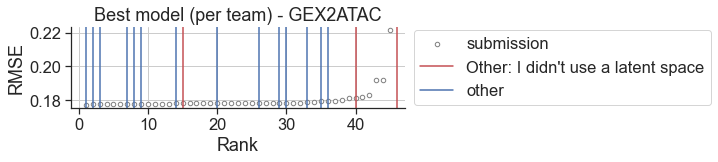

Other: I didn't use a latent space
P value (U-test): 0.032


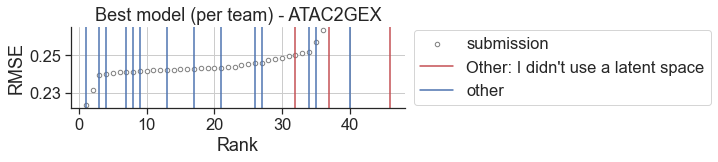

Other: I didn't use a latent space
P value (U-test): 0.006


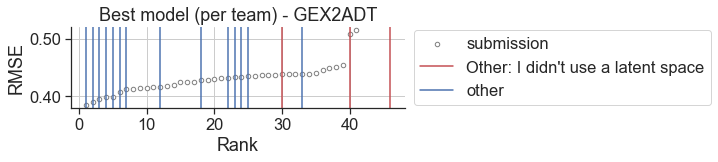

3: Linear dimensionality reduction, directly mappable to input features
P value (U-test): 0.721


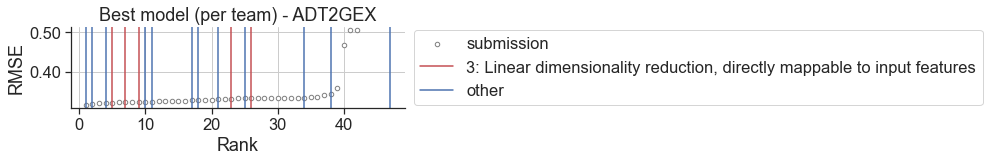

3: Linear dimensionality reduction, directly mappable to input features
P value (U-test): 0.328


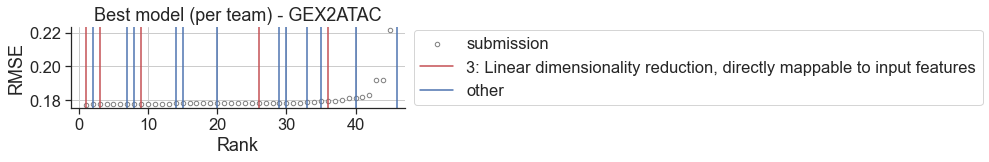

3: Linear dimensionality reduction, directly mappable to input features
P value (U-test): 0.442


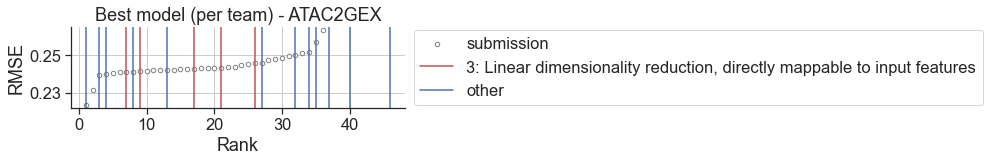

3: Linear dimensionality reduction, directly mappable to input features
P value (U-test): 0.879


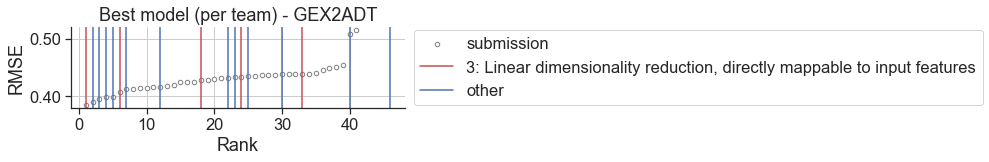

1: Non-linear combinations of all input features in a deep architecture
P value (U-test): 0.525


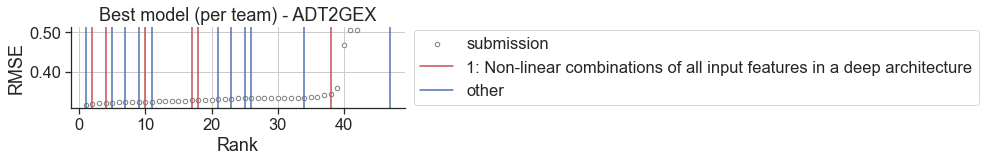

1: Non-linear combinations of all input features in a deep architecture
P value (U-test): 1.0


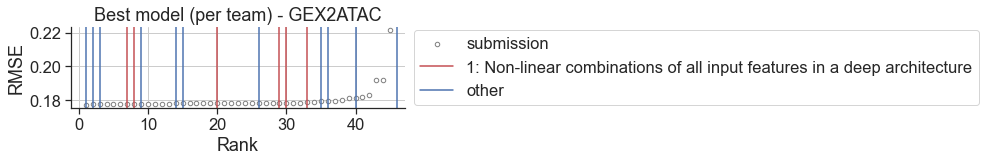

1: Non-linear combinations of all input features in a deep architecture
P value (U-test): 0.884


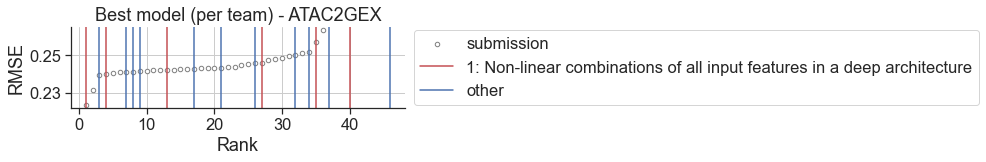

1: Non-linear combinations of all input features in a deep architecture
P value (U-test): 0.18


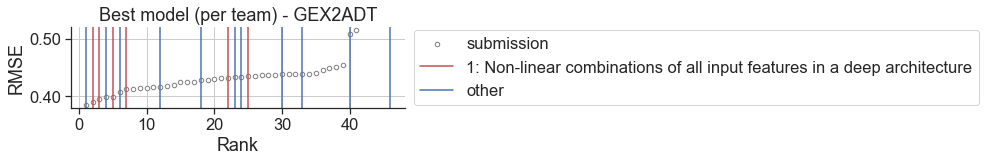

2: Non-linear combination of input features in a shallow architecture
P value (U-test): 0.235


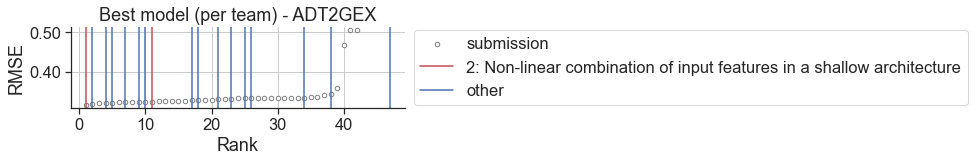

2: Non-linear combination of input features in a shallow architecture
P value (U-test): 0.721


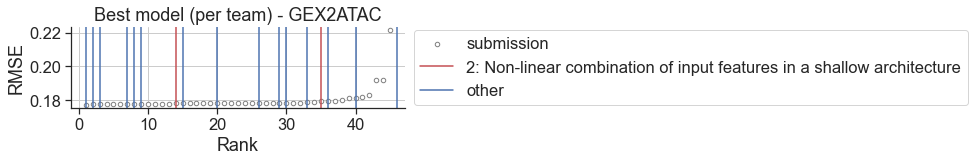

2: Non-linear combination of input features in a shallow architecture
P value (U-test): 0.721


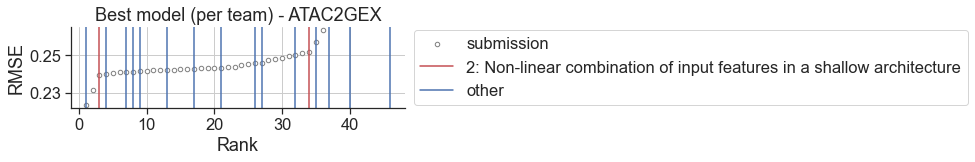

2: Non-linear combination of input features in a shallow architecture
P value (U-test): 0.441


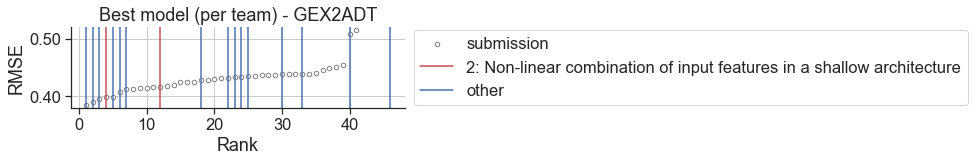

4: Latent space is made of input features
P value (U-test): 0.824


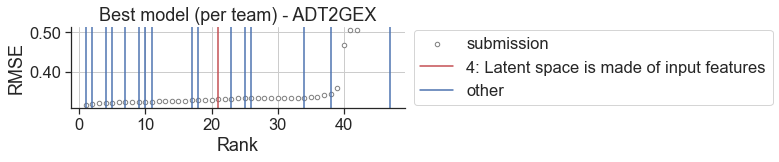

4: Latent space is made of input features
P value (U-test): 0.235


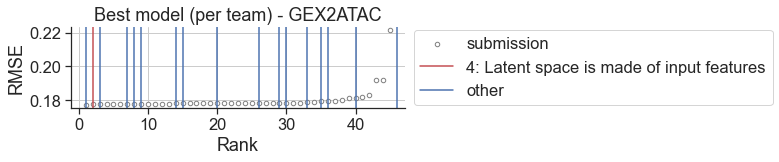

4: Latent space is made of input features
P value (U-test): 0.588


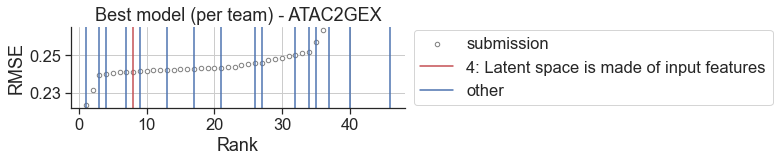

4: Latent space is made of input features
P value (U-test): 0.824


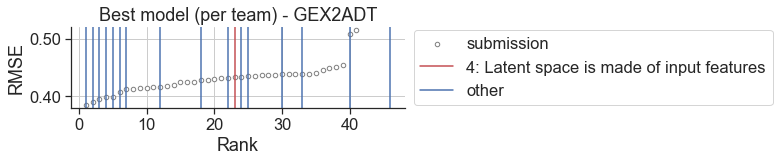

In [128]:
for feature in classes:

    for subtask in subtask_list:

        rank_list = globals()['t1_team_ranks_'+subtask]

        vals = np.array(rank_list[subtask])
        vals = vals[vals<0.7]

        plt.figure(figsize=(6, 1.5))

        plt.title('Best model (per team) - '+subtask)

        scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
        plt.grid()

        # feature of interest
        #v_coords_test = t1_survey_results.loc[[feature in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        v_coords_test = t1_survey_results.loc[t1_survey_results[col_name]==feature, 'rank_'+subtask]
        for x in v_coords_test:
            lines_test = plt.axvline(x, c='r', alpha=1)

        # all other features
        #v_coords_contr = t1_survey_results.loc[[feature not in el for el in t1_survey_results[col_name]], 'rank_'+subtask]
        v_coords_contr = t1_survey_results.loc[t1_survey_results[col_name]!=feature, 'rank_'+subtask]
        for x in v_coords_contr:
            lines_contr = plt.axvline(x, c='b', alpha=1)

        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))

        plt.ylabel('RMSE')
        plt.xlabel('Rank')
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        
        
        plt.legend([scat_plot, lines_test, lines_contr], ['submission', feature, 'other'],
                  loc='center left', bbox_to_anchor=(1, 0.5)) #handles=[red_patch]
        
        #plt.xticks(rotation=90)
        plt.savefig('figures/latent_var_by_rank_'+subtask+'.pdf', bbox_inches='tight')

        plt.show()

# Task2: Survey insights

## Team ranking

In [153]:
# group submissions by team, take to top submission and get rank

t2_team_ranks = t2_submissions.sort_values('Overall', ascending=False).groupby('Team Name').first().sort_values('Overall', ascending=False)

t2_team_ranks['rank'] = [i+1 for i in range(t2_team_ranks.shape[0])]
t2_rank_dict = dict(zip(list(t2_team_ranks.index), t2_team_ranks['rank']))

t2_team_ranks['top4'] = ['top4' for i in range(4)]+['other' for i in range(4,(t2_team_ranks.shape[0]))]
t2_top4_dict = dict(zip(list(t2_team_ranks.index), t2_team_ranks['top4']))

t2_rank_dict

{'GLUE': 1,
 'Novel': 2,
 'SCEMMAPDTHCOFF': 3,
 'LiuZ_Lab_BCM': 4,
 'SysMo': 5,
 'MahfouzLab': 6,
 'KitchenSink': 7,
 'KhrameevaLab': 8,
 'RoyalNeverGiveup': 9,
 'mikephn': 10,
 'teamb': 11,
 '6401workinggourp': 12,
 'willM': 13,
 'GarryLab': 14,
 'DSE': 15,
 'Maxwell': 16,
 'AXX': 17,
 'LiuZLab3': 18,
 'GoLAKERS': 19,
 'SIMBA': 20,
 'Starterkit_test': 21,
 'GALIXIR_SYSU': 22,
 'MMG': 23,
 'Guanlab-dengkw': 24}

In [154]:
t2_team_ranks

id                                       Team Members  \
Team Name                                                                     
GLUE              169959                         xiachenrui,caozj,just_fine   
Novel             170690  zamyatin,vyatkin,nerusskikh,LarisaOk,iigor,rya...   
SCEMMAPDTHCOFF    171096               arni,zoitsang,Miriam.Str,rmnfournier   
LiuZ_Lab_BCM      170815                                       ChaozhongLiu   
SysMo             169083                                       mit,naskomit   
MahfouzLab        169038                              tabdelaal,lmichielsen   
KitchenSink       170507                                             rhngla   
KhrameevaLab      171101                                SteshinSS,shappiron   
RoyalNeverGiveup  170094                                 tianyuliu,gcgreen2   
mikephn           170313                                            mikephn   
teamb             169118                                           brechtus   
6401workinggourp  169576                                            wangsky   
willM             170646                                          wgmorgans   
GarryLab          169225                                  skiex003,gongx030   
DSE               171098                                  wendeppkdc,WeiJin   
Maxwell           168644                                            minxing   
AXX               170385                                   xueer,daxiongshu   
LiuZLab3          170368                                         linhuawang   
GoLAKERS          168820                                         jiahua.rao   
SIMBA             170889         huidongchen,justin_delano,jykr,lucapinello   
Starterkit_test   168693                                          LouiseDck   
GALIXIR_SYSU      168869                                          raojh,zjx   
MMG               169947                                       Meyerscetbon   
Guanlab-dengkw    170699                                             dengkw   

                 Team Members Email Id     Team Members Affiliaton  \
Team Name                                                            
GLUE                                --         ,Peking University,   
Novel                               --  Novel Software System,,,,,   
SCEMMAPDTHCOFF                      --                         ,,,   
LiuZ_Lab_BCM                        --                        None   
SysMo                               --                           ,   
MahfouzLab                          --                           ,   
KitchenSink                         --             Allen Institute   
KhrameevaLab                        --                   Skoltech,   
RoyalNeverGiveup                    --                           ,   
mikephn                             --                        None   
teamb                               --                        None   
6401workinggourp                    --                        None   
willM                               --                        None   
GarryLab                            --                           ,   
DSE                                 --                           ,   
Maxwell                             --                        None   
AXX                                 --                           ,   
LiuZLab3                            --                        None   
GoLAKERS                            --                        None   
SIMBA                               --                         ,,,   
Starterkit_test                     --                        None   
GALIXIR_SYSU                        --                           ,   
MMG                                 --                        None   
Guanlab-dengkw                      --                        None   

                           Challenge Phase    Status     Created By  \
Team Name                                                             
GLUE

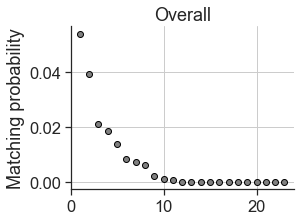

In [155]:
subtask = 'Overall'

rank_list = t2_team_ranks

vals = np.array(rank_list[subtask])
vals = vals[vals<0.7]

plt.figure(figsize=(4, 3))

plt.scatter([i+1 for i in range(len(vals))], vals, c='grey', edgecolors='black')
plt.grid()

plt.xlim(0,24)

plt.title(subtask)

plt.ylabel('Matching probability')
plt.xlabel('')
#plt.axvline(x=9.5, c='black')

#plt.xticks(rotation=90)
#plt.savefig('figures/metric_by_rank_'+subtask+'.pdf', bbox_inches='tight')
plt.savefig('figures/t2_metric_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')

plt.show()

In [156]:
# Fix Team names
# Unknown: LS_Lab, DANCE
t2_rank_dict['AIBS'] = t2_rank_dict['KitchenSink']
del t2_rank_dict['KitchenSink']

t2_rank_dict['DANCE'] = t2_rank_dict['DSE']
del t2_rank_dict['DSE']


In [157]:
t2_survey_results['rank'] = t2_survey_results['Team'].map(t2_rank_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/1514126184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2_survey_results['rank'] = t2_survey_results['Team'].map(t2_rank_dict)


In [165]:
t2_survey_results['top4'] = t2_survey_results['Team'].map(t2_top4_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/1465050073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2_survey_results['top4'] = t2_survey_results['Team'].map(t2_top4_dict)


In [166]:
t2_survey_results['rank'].value_counts()

3    1
9    1
4    1
2    1
8    1
1    1
7    1
5    1
Name: rank, dtype: int64

In [167]:
t2_survey_results

Timestamp First name Last name              Team Email  \
6  2022-01-22 11:23:10.731         --        --    SCEMMAPDTHCOFF    --   
13 2022-01-23 23:22:15.830         --        --  RoyalNeverGiveup    --   
16 2022-01-24 16:45:52.615         --        --      LiuZ_Lab_BCM    --   
19 2022-01-26 00:53:48.317         --        --             Novel    --   
23 2022-01-27 05:12:44.385         --        --      KhrameevaLab    --   
24 2022-01-28 06:13:55.063         --        --              GLUE    --   
29 2022-01-28 18:47:17.372         --        --              AIBS    --   
33 2022-01-30 05:25:09.224         --        --             SysMo    --   

                                   Participated tasks  \
6   Task 1 - Predict Modality, Task 2 - Match Moda...   
13  Task 1 - Predict Modality, Task 2 - Match Moda...   
16                            Task 2 - Match Modality   
19  Task 1 - Predict Modality, Task 2 - Match Moda...   
23  Task 1 - Predict Modality, Task 2 - Match Moda...   
24  Task 1 - Predict Modality, Task 2 - Match Moda...   
29  Task 1 - Predict Modality, Task 2 - Match Moda...   
33                            Task 2 - Match Modality   

                                     General positive  \
6   There was very good participant engagement on ...   
13                       It is very very interesting.   
16  The data is really processed, annotated, and f...   
19  The formulation of match modality task was ver...   
23                                   It took place :)   
24  Well-documented tasks, data and evaluation met...   
29  It was great to have multimodal datasets colle...   
33  Organizers were very helpful with troubleshoot...   

                                     General negative Future data usage  \
6   I think it would be great if recurrent questio...             Maybe   
13  I think it will be better if the competition o...               Yes   
16  Update and changes are not well informed to ev...               Yes   
19                    Time to evaluate the submission               Yes   
23  I would like to have everything done before th...                No   
24              Expanded number of evaluation workers               Yes   
29  Easier-going timelines would be helpful for bo...               Yes   
33  Perhaps more opportunity for collaboration and...               Yes   

                Survey task  ...  \
6   Task 2 - Match Modality  ...   
13  Task 2 - Match Modality  ...   
16  Task 2 - Match Modality  ...   
19  Task 2 - Match Modality  ...   
23  Task 2 - Match Modality  ...   
24  Task 2 - Match Modality  ...   
29  Task 2 - Match Modality  ...   
33  Task 2 - Match Modality  ...   

                             NN model architecture  \
6                          Variational Autoencoder   
13       MLP, Autoencoder, Variational Autoencoder   
16                                MLP, Autoencoder   
19                                MLP, Autoencoder   
23       MLP, Autoencoder, Variational Autoencoder   
24                         Variational Autoencoder   
29                                     Autoencoder   
33  Single layer perceptron + contrastive learning   

                      Model depth Deep learning framework  \
6               1-2 hidden layers                 PyTorch   
13              3-5 hidden layers                 PyTorch   
16              1-2 hidden layers                 PyTorch   
19              3-5 hidden layers                 PyTorch   
23             5-10 hidden layers                 PyTorch   
24              1-2 hidden layers                 PyTorch   
29             5-10 hidden layers                 PyTorch   
33  No hidden layers (no NN used)              Tensorflow   

                            Variation in latent space Contribution  \
6   1: Non-linear combinations of all input featur...          Yes   
13  1: Non-linear combinations of all input featur...          Yes   
16  2: Non-linear combination of input features in...           N

## Algorithm class

In [168]:
t2_survey_results['Algorithm class'].value_counts()

Deep neural network      7
NMF + shallow network    1
Name: Algorithm class, dtype: int64

In [169]:
t2_survey_results_sorted = t2_survey_results.sort_values(by='rank')

In [171]:
catego_plot_df = pd.crosstab(t2_survey_results_sorted['top4'], t2_survey_results_sorted['Algorithm class'])

In [172]:
catego_plot_df = catego_plot_df.sort_index(ascending=False)

In [173]:
catego_plot_df

Algorithm class  Deep neural network  NMF + shallow network
top4                                                       
top4                               4                      0
other                              2                      1

In [174]:
catego_plot_df.loc['top4',:]

Algorithm class
Deep neural network      4
NMF + shallow network    0
Name: top4, dtype: int64

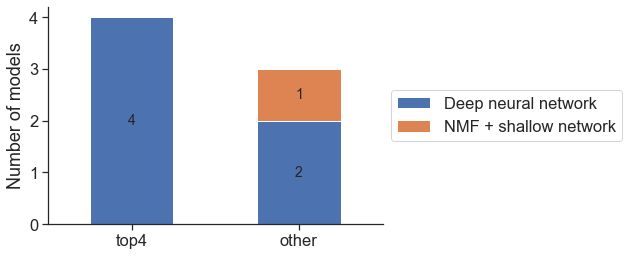

In [175]:
g = catego_plot_df.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Number of models', size=18)
plt.xlabel('')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#loop to add the text
list_values = (list(catego_plot_df.loc[:,'Deep neural network'])+
               list(catego_plot_df.loc[:,'NMF + shallow network'])
              )

for rect, value in zip(g.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    if h!=0:
        g.text(x+w, y+h, value, horizontalalignment='center',verticalalignment='center', fontsize=14)


plt.show()

## Number of params

In [176]:
t2_survey_results_sorted['Param_num_only'] = [s.split('_')[0] for s in t2_survey_results_sorted['Number of parameters']]

In [177]:
t2_survey_results_sorted['Param_num_only'] = [np.nan if s=='NA' else int(s) for s in t2_survey_results_sorted['Param_num_only']]

In [178]:
t2_survey_results_sorted['Param_num_only'] = np.log10(t2_survey_results_sorted['Param_num_only'])

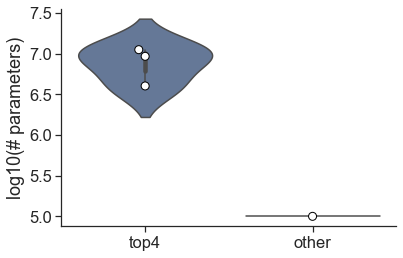

In [179]:
sns.violinplot(x='top4', y='Param_num_only', data=t2_survey_results_sorted, saturation=0.5)
sns.swarmplot(x='top4', y='Param_num_only', data=t2_survey_results_sorted, color="white",
              edgecolor="black",linewidth=1, size=8)

plt.ylabel('log10(# parameters)')
plt.xlabel('')

plt.show()

## Public data usage

In [180]:
t2_survey_results_sorted['Public data usage'].value_counts()

No    8
Name: Public data usage, dtype: int64

In [181]:
catego_plot_df = pd.crosstab(t2_survey_results_sorted['top4'], t2_survey_results_sorted['Public data usage'])

In [182]:
catego_plot_df = catego_plot_df.sort_index(ascending=False)

In [183]:
catego_plot_df

Public data usage  No
top4                 
top4                4
other               3

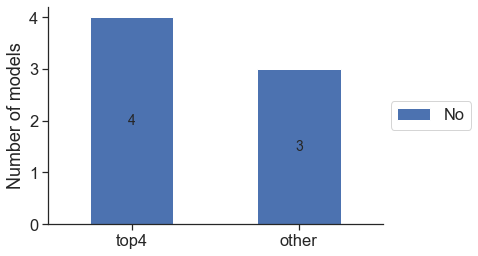

In [184]:
g = catego_plot_df.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Number of models')
plt.xlabel('')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#loop to add the text
list_values = (list(catego_plot_df.loc[:,'No']))

for rect, value in zip(g.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    if h!=0:
        g.text(x+w, y+h, value, horizontalalignment='center',verticalalignment='center', fontsize=14)


plt.show()

## Dim reduction approach

In [185]:
t2_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info', 'rank',
       'top4', 'Param_num_only'],
      dtype='object')

In [186]:
# get all possible values

all_vals = t2_survey_results_sorted['Dim reduction approach']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [187]:
all_vals

['Deep autoencoders',
 'LSI',
 'Non-negative matrix factorization',
 'Principal Component Analysis (PCA)',
 'Canonical Correlation Analysis (CCA)',
 'Uniform Manifold Approximation and Projection (UMAP)']

In [188]:
dim_red_fix_dict = {
    
    'Non-negative matrix factorization':'NMF',
    'LSI':'LSI',
    'Canonical Correlation Analysis (CCA)':'CCA',
    'Uniform Manifold Approximation and Projection (UMAP)':'UMAP',
    'Principal Component Analysis (PCA)':'PCA',
    'Deep autoencoders':'AE'
    
}

In [189]:
fixed_col = []

for s in t2_survey_results_sorted['Dim reduction approach']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t2_survey_results_sorted['Dim_red_fixed'] = fixed_col

In [190]:
t2_survey_results_sorted['Dim_red_fixed']

24     [PCA, AE]
19         [LSI]
6          [PCA]
16    [UMAP, AE]
33         [NMF]
29          [AE]
23     [CCA, AE]
13     [PCA, AE]
Name: Dim_red_fixed, dtype: object

In [191]:
t2_survey_results_sorted_top4 = t2_survey_results_sorted.loc[t2_survey_results_sorted['top4']=='top4',:]

In [192]:
t2_survey_results_sorted_other = t2_survey_results_sorted.loc[t2_survey_results_sorted['top4']!='top4',:]

top4 df

In [193]:
dim_res_top4 = t2_survey_results_sorted_top4['Dim_red_fixed']
dim_res_top4 = flatten(dim_res_top4)
dim_res_top4 = dict(Counter(dim_res_top4))

In [194]:
plot_df = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [195]:
plot_df.loc[:,'method'] = list(dim_res_top4.keys())
plot_df.loc[:,'use_count'] = list(dim_res_top4.values())
plot_df.loc[:,'use_count'] = plot_df.loc[:,'use_count'] / t2_survey_results_sorted_top4.shape[0]
plot_df.loc[:,'group'] = 'top4'

In [196]:
plot_df

method  use_count group
0    PCA       0.50  top4
1     AE       0.50  top4
2    LSI       0.25  top4
3   UMAP       0.25  top4

Other df

In [197]:
dim_res_other = t2_survey_results_sorted_other['Dim_red_fixed']
dim_res_other = flatten(dim_res_other)
dim_res_other = dict(Counter(dim_res_other))

In [198]:
plot_df_other = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [199]:
plot_df_other.loc[:,'method'] = list(dim_res_other.keys())
plot_df_other.loc[:,'use_count'] = list(dim_res_other.values())
plot_df_other.loc[:,'use_count'] = plot_df_other.loc[:,'use_count'] / t2_survey_results_sorted_other.shape[0]
plot_df_other.loc[:,'group'] = 'other'

In [200]:
plot_df_all = pd.concat([plot_df, plot_df_other])

In [201]:
plot_df_all

method  use_count  group
0    PCA       0.50   top4
1     AE       0.50   top4
2    LSI       0.25   top4
3   UMAP       0.25   top4
0    NMF       0.25  other
1     AE       0.75  other
2    CCA       0.25  other
3    PCA       0.25  other

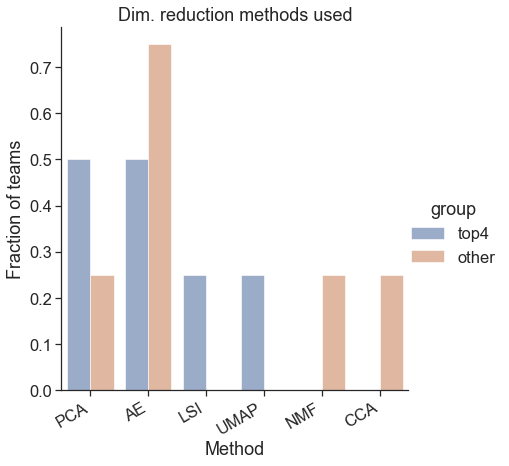

In [202]:
sns.catplot(
    data=plot_df_all, kind="bar",
    x="method", y="use_count", hue="group",
    alpha=.6, height=6)

plt.title('Dim. reduction methods used')
plt.ylabel('Fraction of teams')
plt.xlabel('Method')

plt.xticks(rotation = 30, ha="right")

plt.show()

## NN model architecture

In [203]:
t2_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info', 'rank',
       'top4', 'Param_num_only', 'Dim_red_fixed'],
      dtype='object')

In [204]:
t2_survey_results_sorted['NN model architecture']

24                           Variational Autoencoder
19                                  MLP, Autoencoder
6                            Variational Autoencoder
16                                  MLP, Autoencoder
33    Single layer perceptron + contrastive learning
29                                       Autoencoder
23         MLP, Autoencoder, Variational Autoencoder
13         MLP, Autoencoder, Variational Autoencoder
Name: NN model architecture, dtype: object

In [205]:
# get all possible values

all_vals = t2_survey_results_sorted['NN model architecture']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [206]:
all_vals

['Variational Autoencoder',
 'Single layer perceptron + contrastive learning',
 'Autoencoder',
 'MLP']

In [207]:
dim_red_fix_dict = {
    
    'Single layer perceptron + contrastive learning':'SLP + contrative learning',
    'Variational Autoencoder':'VAE',
    'Autoencoder':'AE',
    'MLP':'MLP'
    
}

In [208]:
fixed_col = []

for s in t2_survey_results_sorted['NN model architecture']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t2_survey_results_sorted['NN_arch_fixed'] = fixed_col

In [209]:
t2_survey_results_sorted['NN_arch_fixed']

24                          [VAE]
19                      [MLP, AE]
6                           [VAE]
16                      [MLP, AE]
33    [SLP + contrative learning]
29                           [AE]
23                 [MLP, AE, VAE]
13                 [MLP, AE, VAE]
Name: NN_arch_fixed, dtype: object

In [210]:
t2_survey_results_sorted_top4 = t2_survey_results_sorted.loc[t2_survey_results_sorted['top4']=='top4',:]

In [211]:
t2_survey_results_sorted_other = t2_survey_results_sorted.loc[t2_survey_results_sorted['top4']!='top4',:]

top4 df

In [212]:
dim_res_top4 = t2_survey_results_sorted_top4['NN_arch_fixed']
dim_res_top4 = flatten(dim_res_top4)
dim_res_top4 = dict(Counter(dim_res_top4))

In [213]:
plot_df = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [214]:
plot_df.loc[:,'method'] = list(dim_res_top4.keys())
plot_df.loc[:,'use_count'] = list(dim_res_top4.values())
plot_df.loc[:,'use_count'] = plot_df.loc[:,'use_count'] / t2_survey_results_sorted_top4.shape[0]
plot_df.loc[:,'group'] = 'top4'

In [215]:
plot_df

method  use_count group
0    VAE        0.5  top4
1    MLP        0.5  top4
2     AE        0.5  top4

Other df

In [216]:
dim_res_other = t2_survey_results_sorted_other['NN_arch_fixed']
dim_res_other = flatten(dim_res_other)
dim_res_other = dict(Counter(dim_res_other))

In [217]:
plot_df_other = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [218]:
plot_df_other.loc[:,'method'] = list(dim_res_other.keys())
plot_df_other.loc[:,'use_count'] = list(dim_res_other.values())
plot_df_other.loc[:,'use_count'] = plot_df_other.loc[:,'use_count'] / t2_survey_results_sorted_other.shape[0]
plot_df_other.loc[:,'group'] = 'other(9)'

In [219]:
plot_df_all = pd.concat([plot_df, plot_df_other])

In [220]:
plot_df_all

method  use_count     group
0                        VAE       0.50      top4
1                        MLP       0.50      top4
2                         AE       0.50      top4
0  SLP + contrative learning       0.25  other(9)
1                         AE       0.75  other(9)
2                        MLP       0.50  other(9)
3                        VAE       0.50  other(9)

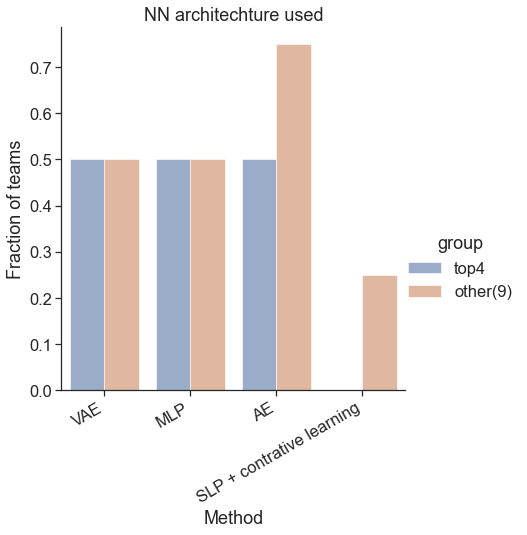

In [221]:
sns.catplot(
    data=plot_df_all, kind="bar",
    x="method", y="use_count", hue="group",
    alpha=.6, height=6)

plt.title('NN architechture used')
plt.ylabel('Fraction of teams')
plt.xlabel('Method')

plt.xticks(rotation = 30, ha="right")

plt.show()

## Model depth

In [222]:
t2_survey_results['Model depth'].value_counts()

1-2 hidden layers                3
3-5 hidden layers                2
5-10 hidden layers               2
No hidden layers (no NN used)    1
Name: Model depth, dtype: int64

### Per subtask

In [223]:
col_name = 'Model depth'
t2_survey_results[col_name].value_counts()

1-2 hidden layers                3
3-5 hidden layers                2
5-10 hidden layers               2
No hidden layers (no NN used)    1
Name: Model depth, dtype: int64

In [224]:
#classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes = list(t2_survey_results[col_name].unique())
classes

['1-2 hidden layers',
 '3-5 hidden layers',
 '5-10 hidden layers',
 'No hidden layers (no NN used)']

In [225]:
classes = ['No hidden layers (no NN used)',
           '1-2 hidden layers',
           '3-5 hidden layers',
           '5-10 hidden layers']

In [226]:
subtask_list = ['Overall']

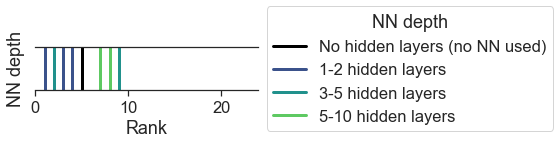

No hidden layers (no NN used)
P value (U-test): 1.0
1-2 hidden layers
P value (U-test): 0.143
3-5 hidden layers
P value (U-test): 0.857
5-10 hidden layers
P value (U-test): 0.286


In [227]:
for subtask in subtask_list:

    rank_list = t2_team_ranks

    vals = np.array(rank_list[subtask])
    vals = vals[vals<0.7]

    plt.figure(figsize=(4, 0.8))

    #plt.title(subtask)

    #scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()
    
    col_list = ['black']+ list(sns.color_palette("viridis", n_colors=len(classes)-1))
    col_list_red = col_list[:len(classes)]
    
    for feature,col in zip(classes, col_list_red):
        
        # feature of interest
        v_coords_test = t2_survey_results.loc[t2_survey_results[col_name]==feature, 'rank']
        #kick categories with only one data point
        if len(v_coords_test)<=1:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=3, label=feature)
        
        else:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=3, label=feature)
            for x in v_coords_test[1:]:
                lines_test = plt.axvline(x, c=col, alpha=1, linewidth=3)

    # # feature of interest
    # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
    # for x in v_coords_test:
    #     lines_test = plt.axvline(x, c='r', alpha=1)
    # 
    # # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    # 
    #  # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    
    plt.xlim(0,24)

    plt.ylabel('NN depth')
    plt.xlabel('Rank')

    plt.yticks([])
    #plt.xticks([])

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    plt.legend(title="NN depth",loc='center left', bbox_to_anchor=(1, 0.5)) 

    #plt.xticks(rotation=90)
    plt.savefig('figures/t2_depth_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    #plt.savefig('figures/t2_depth_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()
    
    for feature in classes:
        
        v_coords_test = t2_survey_results.loc[t2_survey_results[col_name]==feature, 'rank']
        v_coords_contr = t2_survey_results.loc[t2_survey_results[col_name]!=feature, 'rank']
        
        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))
    
    

## Variation in latent space

In [228]:
t2_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info', 'rank',
       'top4', 'Param_num_only', 'Dim_red_fixed', 'NN_arch_fixed'],
      dtype='object')

In [229]:
t2_survey_results_sorted['Variation in latent space']

24    2: Non-linear combination of input features in...
19    2: Non-linear combination of input features in...
6     1: Non-linear combinations of all input featur...
16    2: Non-linear combination of input features in...
33    2: Non-linear combination of input features in...
29    1: Non-linear combinations of all input featur...
23    1: Non-linear combinations of all input featur...
13    1: Non-linear combinations of all input featur...
Name: Variation in latent space, dtype: object

In [230]:
t2_survey_results['Variation in latent space'].value_counts()

1: Non-linear combinations of all input features in a deep architecture    4
2: Non-linear combination of input features in a shallow architecture      4
Name: Variation in latent space, dtype: int64

In [231]:
t2_survey_results_sorted = t2_survey_results.sort_values(by='rank')

### Per subtask

In [232]:
col_name = 'Variation in latent space'
t2_survey_results[col_name].value_counts()

1: Non-linear combinations of all input features in a deep architecture    4
2: Non-linear combination of input features in a shallow architecture      4
Name: Variation in latent space, dtype: int64

In [233]:
#classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes = list(t2_survey_results[col_name].unique())
classes

['1: Non-linear combinations of all input features in a deep architecture',
 '2: Non-linear combination of input features in a shallow architecture']

In [234]:
subtask_list = ['Overall']

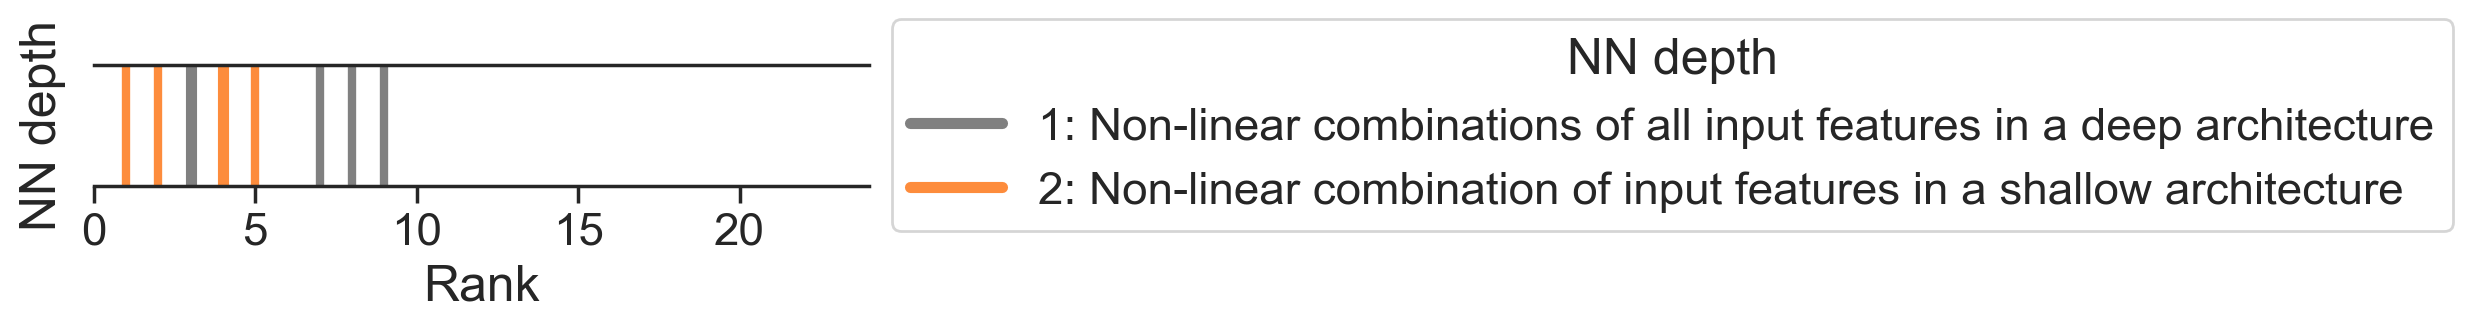

1: Non-linear combinations of all input features in a deep architecture
P value (U-test): 0.114
2: Non-linear combination of input features in a shallow architecture
P value (U-test): 0.114


In [235]:
for subtask in subtask_list:

    rank_list = t2_team_ranks

    vals = np.array(rank_list[subtask])
    vals = vals[vals<0.7]

    plt.figure(figsize=(5, 0.8), dpi=200)

    #plt.title(subtask)

    #scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()
    
    col_list = ['grey']+ list(sns.color_palette("YlOrRd", n_colors=len(classes)-1))
    col_list_red = col_list
    
    for feature,col in zip(classes, col_list_red):
        
        # feature of interest
        v_coords_test = t2_survey_results.loc[t2_survey_results[col_name]==feature, 'rank']
        #kick categories with only one data point
        if len(v_coords_test)<=1:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=4, label=feature)
        
        else:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=4, label=feature)
            for x in v_coords_test[1:]:
                lines_test = plt.axvline(x, c=col, alpha=1, linewidth=3)

    # # feature of interest
    # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
    # for x in v_coords_test:
    #     lines_test = plt.axvline(x, c='r', alpha=1)
    # 
    # # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    # 
    #  # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    
    plt.xlim(0,24)

    plt.ylabel('NN depth')
    plt.xlabel('Rank')

    plt.yticks([])
    #plt.xticks([])

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    plt.legend(title="NN depth",loc='center left', bbox_to_anchor=(1, 0.5)) 

    #plt.xticks(rotation=90)
    plt.savefig('figures/t2_depth_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    #plt.savefig('figures/t2_depth_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()
    
    for feature in classes:
        
        v_coords_test = t2_survey_results.loc[t2_survey_results[col_name]==feature, 'rank']
        v_coords_contr = t2_survey_results.loc[t2_survey_results[col_name]!=feature, 'rank']
        
        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))
    
    

# Task3: Survey insights

## Team ranking

In [236]:
t3_submissions.columns

Index(['id', 'Team Name', 'type', 'Team Members', 'Team Members Email Id',
       'Team Members Affiliaton', 'Challenge Phase', 'Status', 'Created By',
       'Execution Time(sec.)', 'Submission Number', 'Submitted File',
       'Stdout File', 'Stderr File', 'Submitted At', 'Submission Result File',
       'Submission Metadata File', 'Method Name', 'Method Description',
       'Publication URL', 'Project URL', 'Submission Meta Attributes',
       'arithmetic_mean', 'arithmetic_mean_ADT', 'arithmetic_mean_ATAC',
       'asw_batch_ATAC', 'cc_cons_ATAC', 'graph_conn_ATAC', 'cc_cons_ADT',
       'asw_batch_ADT', 'nmi_ATAC', 'asw_label_ADT', 'nmi_ADT',
       'ti_cons_batch_mean_ATAC', 'graph_conn_ADT', 'asw_label_ATAC',
       'ti_cons_batch_mean_ADT', 'bio_conservation_ADT',
       'bio_conservation_ATAC', 'batch_removal_ADT', 'batch_removal_ATAC'],
      dtype='object')

In [237]:
t3_submissions['Team Name'].value_counts()

Amateur                 15
LiuZ_Lab_BCM            15
Collab at AskExplain    15
TeamRegGen              15
Living-Systems-Lab      14
mikephn                 14
KhrameevaLab            11
BIOCL                   10
Guanlab-dengkw           7
S_lab                    6
willM                    6
ob1a                     6
SIMBA                    5
MahfouzLab               5
GarryLab                 4
balia                    4
GALIXIR_SYSU             3
Transbio_NB              3
GLUE                     2
Teddy                    1
teamupupup               1
DJG lab                  1
Maxwell                  1
FinPak                   1
BIMSB Bioinformatics     1
ComManDo                 1
Name: Team Name, dtype: int64

In [238]:
t3_team_ranks_Overall = t3_submissions.sort_values('arithmetic_mean', ascending=False).groupby('Team Name').first().sort_values('arithmetic_mean', ascending=False)
t3_team_ranks_Overall['rank_Overall'] = [i+1 for i in range(t3_team_ranks_Overall.shape[0])]
t3_rank_dict_Overall = dict(zip(list(t3_team_ranks_Overall.index), t3_team_ranks_Overall['rank_Overall']))

t3_team_ranks_ADT = t3_submissions.sort_values('arithmetic_mean_ADT', ascending=False).groupby('Team Name').first().sort_values('arithmetic_mean_ADT', ascending=False)
t3_team_ranks_ADT['rank_ADT'] = [i+1 for i in range(t3_team_ranks_ADT.shape[0])]
t3_rank_dict_ADT = dict(zip(list(t3_team_ranks_ADT.index), t3_team_ranks_ADT['rank_ADT']))

t3_team_ranks_ATAC = t3_submissions.sort_values('arithmetic_mean_ATAC', ascending=False).groupby('Team Name').first().sort_values('arithmetic_mean_ATAC', ascending=False)
t3_team_ranks_ATAC['rank_ATAC'] = [i+1 for i in range(t3_team_ranks_ATAC.shape[0])]
t3_rank_dict_ATAC = dict(zip(list(t3_team_ranks_ATAC.index), t3_team_ranks_ATAC['rank_ATAC']))

In [269]:
# optional check of top 4 methods
t3_team_ranks_Overall['top4'] = ['top4' for i in range(4)]+['other' for i in range(4,(t3_team_ranks_Overall.shape[0]))]
t3_top4_dict = dict(zip(list(t3_team_ranks_Overall.index), t3_team_ranks_Overall['top4']))

In [239]:
t3_team_ranks_ADT

id        type  \
Team Name                                    
Amateur               170936.0  pretrained   
LiuZ_Lab_BCM          170622.0  pretrained   
Guanlab-dengkw        170795.0      online   
S_lab                 169995.0  pretrained   
TeamRegGen            169683.0      online   
GarryLab              170122.0      online   
mikephn               170081.0      online   
Living-Systems-Lab    170594.0      online   
SIMBA                 171367.0      online   
BIOCL                 170876.0      online   
GLUE                  171078.0      online   
Collab at AskExplain  170807.0      online   
FinPak                168524.0      online   
teamupupup            170423.0      online   
Maxwell               168647.0      online   
balia                 170627.0  pretrained   
ob1a                  169974.0      online   
MahfouzLab            169055.0      online   
Transbio_NB           169860.0      online   
GALIXIR_SYSU          168849.0      online   
DJG lab               169223.0      online   
BIMSB Bioinformatics  168939.0  pretrained   
willM                 170631.0      online   
ComManDo              171086.0      online   
Teddy                 170704.0      online   
KhrameevaLab          171059.0      online   

                                                    Team Members  \
Team Name                                                          
Amateur                                         AliceAlice,Kimmo   
LiuZ_Lab_BCM                                        ChaozhongLiu   
Guanlab-dengkw                                            dengkw   
S_lab                                                       doge   
TeamRegGen                                            TeamRegGen   
GarryLab                                       skiex003,gongx030   
mikephn                                                  mikephn   
Living-Systems-Lab                                        Sumeer   
SIMBA                 huidongchen,justin_delano,jykr,lucapinello   
BIOCL                                                     rvinas   
GLUE                                  xiachenrui,caozj,just_fine   
Collab at AskExplain                           DavidB_AskExplain   
FinPak                     dskhanirfan,ayyazazeem,Suleiman,Ammad   
teamupupup                                         codingdog,zwy   
Maxwell                                                  minxing   
balia                                            gr8joo,sungyoon   
ob1a                                                 orangeballs   
MahfouzLab                                 tabdelaal,lmichielsen   
Transbio_NB                                             xabiermm   
GALIXIR_SYSU                                           raojh,zjx   
DJG lab                                                erikjskie   
BIMSB Bioinformatics                                  wkopp,jona   
willM                                                  wgmorgans   
ComManDo                                      Oafish,daifengwang   
Teddy                                                      Teddy   
KhrameevaLab                                 SteshinSS,shappiron   

                     Team Members Email Id  \
Team Name                                    
Amateur                                 --   
LiuZ_Lab_BCM                            --   
Guanlab-dengkw                          --   
S_lab                                   --   
TeamRegGen                              --   
GarryLab                                --   
mikephn                                 --   
Living-Systems-Lab                      --   
SIMBA                                   --   
BIOCL                                   --   
GLUE                                    --   
Collab at AskExplain                    --   
FinPak                                  --   
teamupupup                              --   
Maxwell                                 --   
balia                                   --   
ob1a  

### Per subtask

In [240]:
task_dict = {'arithmetic_mean':'Overall',
            'arithmetic_mean_ADT':'ADT',
            'arithmetic_mean_ATAC':'ATAC'}

In [241]:
subtask_list = ['arithmetic_mean_ADT', 'arithmetic_mean_ATAC']

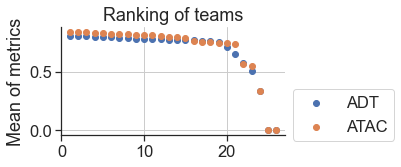

In [242]:
plt.figure(figsize=(4, 2))

for subtask in subtask_list:
    
    rank_list = globals()['t3_team_ranks_'+task_dict[subtask]]
    
    vals = np.array(rank_list[subtask])
    #vals = vals[vals<0.7]
    
    plt.scatter([i+1 for i in range(len(vals))], vals, edgecolors=None, label=task_dict[subtask])
    plt.grid()
    
    plt.xlim(0,27)
    
    plt.title(subtask)
    

    #plt.axvline(x=9.5, c='black')

    #plt.xticks(rotation=90)

    
plt.grid()
plt.title('Ranking of teams')
plt.ylabel('Mean of metrics')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1, 0.5))  

plt.savefig('figures/t3_metric_by_rank_'+subtask+'.pdf', bbox_inches='tight')
#plt.savefig('figures/t3_metric_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    
plt.show()

In [243]:
t3_submissions.columns

Index(['id', 'Team Name', 'type', 'Team Members', 'Team Members Email Id',
       'Team Members Affiliaton', 'Challenge Phase', 'Status', 'Created By',
       'Execution Time(sec.)', 'Submission Number', 'Submitted File',
       'Stdout File', 'Stderr File', 'Submitted At', 'Submission Result File',
       'Submission Metadata File', 'Method Name', 'Method Description',
       'Publication URL', 'Project URL', 'Submission Meta Attributes',
       'arithmetic_mean', 'arithmetic_mean_ADT', 'arithmetic_mean_ATAC',
       'asw_batch_ATAC', 'cc_cons_ATAC', 'graph_conn_ATAC', 'cc_cons_ADT',
       'asw_batch_ADT', 'nmi_ATAC', 'asw_label_ADT', 'nmi_ADT',
       'ti_cons_batch_mean_ATAC', 'graph_conn_ADT', 'asw_label_ATAC',
       'ti_cons_batch_mean_ADT', 'bio_conservation_ADT',
       'bio_conservation_ATAC', 'batch_removal_ADT', 'batch_removal_ATAC'],
      dtype='object')

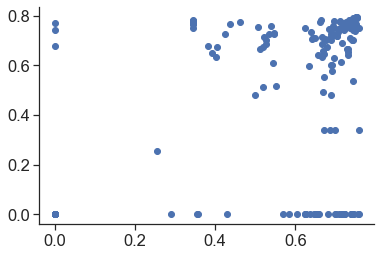

In [245]:
plt.scatter(t3_submissions.bio_conservation_ADT, t3_submissions.bio_conservation_ATAC)

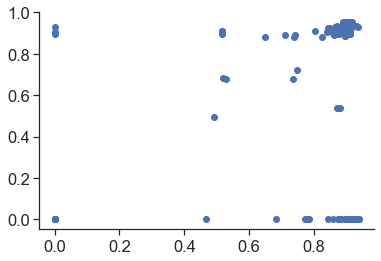

In [246]:
plt.scatter(t3_submissions.batch_removal_ADT, t3_submissions.batch_removal_ATAC)

In [247]:
# Fix Team names
# Unknown: AskExplain
t3_rank_dict_Overall['AskExplain'] = t3_rank_dict_Overall['Collab at AskExplain']
del t3_rank_dict_Overall['Collab at AskExplain']

t3_rank_dict_ADT['AskExplain'] = t3_rank_dict_ADT['Collab at AskExplain']
del t3_rank_dict_ADT['Collab at AskExplain']

t3_rank_dict_ATAC['AskExplain'] = t3_rank_dict_ATAC['Collab at AskExplain']
del t3_rank_dict_ATAC['Collab at AskExplain']

In [248]:
t3_survey_results['rank_Overall'] = t3_survey_results['Team'].map(t3_rank_dict_Overall)

t3_survey_results['rank_ADT'] = t3_survey_results['Team'].map(t3_rank_dict_ADT)

t3_survey_results['rank_ATAC'] = t3_survey_results['Team'].map(t3_rank_dict_ATAC)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/2149726113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3_survey_results['rank_Overall'] = t3_survey_results['Team'].map(t3_rank_dict_Overall)
/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/2149726113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3_survey_results['rank_ADT'] = t3_survey_results['Team'].map(t3_rank_dict_ADT)
/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/2149726113.py:5: Settin

In [249]:
t3_survey_results['rank_Overall'].value_counts()

23    1
1     1
4     1
10    1
13    1
8     1
11    1
9     1
18    1
3     1
Name: rank_Overall, dtype: int64

## Algorithm class

In [263]:
t3_survey_results['Algorithm class'].value_counts()

Deep neural network                                                                          6
A form of joint truncated Singular Value Decomposition (Generalised Canonical Procrustes)    1
a shallow neural network                                                                     1
Linear / Logisitc / Kernel Regression                                                        1
Truncated SVD                                                                                1
Name: Algorithm class, dtype: int64

In [264]:
algorithm_fix_dict = {
    
    'A form of joint truncated Singular Value Decomposition (Generalised Canonical Procrustes)':'Generalised Canonical Procrustes',
    'Deep neural network':'Deep neural network',
    'Linear / Logisitc / Kernel Regression':'Linear / Logisitc / Kernel Regression',
    'Truncated SVD':'Truncated SVD',
    'a shallow neural network':'Shallow neural network'
    
}

In [265]:
t3_survey_results['Algorithm class fixed'] = t3_survey_results['Algorithm class'].map(algorithm_fix_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/3726232695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3_survey_results['Algorithm class fixed'] = t3_survey_results['Algorithm class'].map(algorithm_fix_dict)


In [266]:
t3_survey_results['Algorithm class fixed'].value_counts()

Deep neural network                      6
Generalised Canonical Procrustes         1
Shallow neural network                   1
Linear / Logisitc / Kernel Regression    1
Truncated SVD                            1
Name: Algorithm class fixed, dtype: int64

In [359]:
t3_survey_results_sorted = t3_survey_results.sort_values(by='rank_Overall')

In [360]:
t3_survey_results_sorted['top4'] = t3_survey_results['Team'].map(t3_top4_dict)

In [271]:
catego_plot_df = pd.crosstab(t3_survey_results_sorted['top4'], t3_survey_results_sorted['Algorithm class fixed'])

In [272]:
catego_plot_df = catego_plot_df.sort_index(ascending=False)

In [273]:
catego_plot_df

Algorithm class fixed  Deep neural network  \
top4                                         
top4                                     2   
other                                    4   

Algorithm class fixed  Linear / Logisitc / Kernel Regression  \
top4                                                           
top4                                                       0   
other                                                      1   

Algorithm class fixed  Shallow neural network  Truncated SVD  
top4                                                          
top4                                        0              1  
other                                       1              0

In [275]:
catego_plot_df.loc['top4',:]

Algorithm class fixed
Deep neural network                      2
Linear / Logisitc / Kernel Regression    0
Shallow neural network                   0
Truncated SVD                            1
Name: top4, dtype: int64

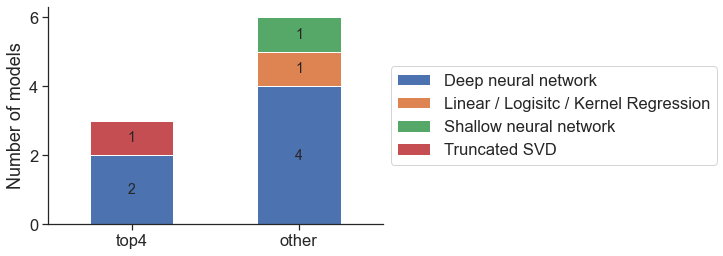

In [279]:
g = catego_plot_df.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Number of models', size=18)
plt.xlabel('')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#loop to add the text
list_values = (list(catego_plot_df.loc[:,'Deep neural network'])+
               list(catego_plot_df.loc[:,'Shallow neural network'])+
               list(catego_plot_df.loc[:,'Linear / Logisitc / Kernel Regression'])+
               list(catego_plot_df.loc[:,'Truncated SVD'])
              )

for rect, value in zip(g.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    if h!=0:
        g.text(x+w, y+h, value, horizontalalignment='center',verticalalignment='center', fontsize=14)


plt.show()

## Number of params

In [280]:
t3_survey_results_sorted['Param_num_only'] = [s.split('_')[0] for s in t3_survey_results_sorted['Number of parameters']]

In [281]:
t3_survey_results_sorted['Param_num_only'] = [np.nan if s=='NA' else int(s) for s in t3_survey_results_sorted['Param_num_only']]

In [282]:
t3_survey_results_sorted['Param_num_only'] = np.log10(t3_survey_results_sorted['Param_num_only']+1)

In [283]:
t3_survey_results_sorted['Param_num_only']

7     5.079185
37    0.000000
8     6.689288
18         NaN
31    6.477121
15    5.477123
25    7.698970
17         NaN
32         NaN
1          NaN
Name: Param_num_only, dtype: float64

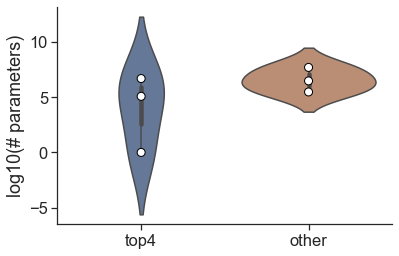

In [285]:
sns.violinplot(x='top4', y='Param_num_only', data=t3_survey_results_sorted, saturation=0.5)
sns.swarmplot(x='top4', y='Param_num_only', data=t3_survey_results_sorted, color="white",
              edgecolor="black",linewidth=1, size=8)

plt.ylabel('log10(# parameters)')
plt.xlabel('')

plt.show()

## Public data usage

In [286]:
t3_survey_results_sorted['Public data usage'].value_counts()

No                               6
Yes, for pretraining & more      2
Yes, but only for prototyping    2
Name: Public data usage, dtype: int64

In [287]:
catego_plot_df = pd.crosstab(t3_survey_results_sorted['top4'], t3_survey_results_sorted['Public data usage'])

In [288]:
catego_plot_df = catego_plot_df.sort_index(ascending=False)

In [289]:
catego_plot_df

Public data usage  No  Yes, but only for prototyping  \
top4                                                   
top4                2                              0   
other               4                              2   

Public data usage  Yes, for pretraining & more  
top4                                            
top4                                         1  
other                                        0

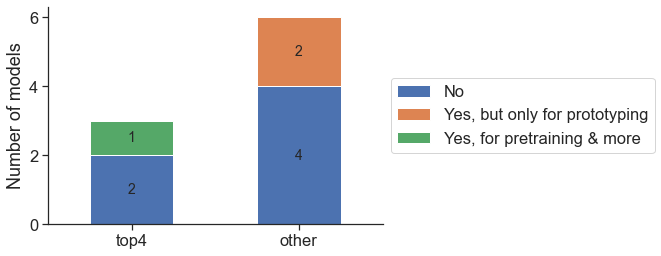

In [290]:
g = catego_plot_df.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Number of models')
plt.xlabel('')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#loop to add the text
list_values = (list(catego_plot_df.loc[:,'No'])+
               list(catego_plot_df.loc[:,'Yes, but only for prototyping'])+
               list(catego_plot_df.loc[:,'Yes, for pretraining & more'])
              )

for rect, value in zip(g.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    if h!=0:
        g.text(x+w, y+h, value, horizontalalignment='center',verticalalignment='center', fontsize=14)


plt.show()

## Dim reduction approach

In [291]:
t3_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_Overall', 'rank_ADT', 'rank_ATAC', 'Algorithm class fixed',
       'top4', 'Param_num_only'],
      dtype='object')

In [292]:
# get all possible values

all_vals = t3_survey_results_sorted['Dim reduction approach']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [293]:
all_vals

['Deep autoencoders',
 'Multi-Relational Graph Embeddings ',
 'Principal Component Analysis (PCA)',
 'Truncated SVD',
 'Canonical Correlation Analysis (CCA)',
 'Uniform Manifold Approximation and Projection (UMAP)',
 'Multi-Dimensional Scaling (MDS)',
 'Generalised Canonical Procrustes (gcproc): https://github.com/AskExplain/gcproc']

In [294]:
dim_red_fix_dict = {
    
    'Generalised Canonical Procrustes (gcproc): https://github.com/AskExplain/gcproc':'gcproc',
    'Multi-Relational Graph Embeddings ':'Graph emb.',
    'Canonical Correlation Analysis (CCA)':'CCA',
    'Uniform Manifold Approximation and Projection (UMAP)':'UMAP',
    'Principal Component Analysis (PCA)':'PCA',
    'Deep autoencoders':'AE',
    'Truncated SVD':'Trunc. SVD',
    'Multi-Dimensional Scaling (MDS)':'MDS'
    
}

In [295]:
fixed_col = []

for s in t3_survey_results_sorted['Dim reduction approach']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t3_survey_results_sorted['Dim_red_fixed'] = fixed_col

In [296]:
t3_survey_results_sorted['Dim_red_fixed']

7               [PCA, AE]
37      [PCA, Trunc. SVD]
8                    [AE]
18           [Graph emb.]
31                   [AE]
15              [PCA, AE]
25                   [AE]
17               [gcproc]
32    [PCA, CCA, MDS, AE]
1                  [UMAP]
Name: Dim_red_fixed, dtype: object

In [300]:
t3_survey_results_sorted_top = t3_survey_results_sorted.loc[t3_survey_results_sorted['top4']=='top4',:]

In [301]:
t3_survey_results_sorted_other = t3_survey_results_sorted.loc[t3_survey_results_sorted['top4']!='top4',:]

top df

In [302]:
dim_res_top = t3_survey_results_sorted_top['Dim_red_fixed']
dim_res_top = flatten(dim_res_top)
dim_res_top = dict(Counter(dim_res_top))

In [303]:
plot_df = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [304]:
plot_df.loc[:,'method'] = list(dim_res_top.keys())
plot_df.loc[:,'use_count'] = list(dim_res_top.values())
plot_df.loc[:,'use_count'] = plot_df.loc[:,'use_count'] / t3_survey_results_sorted_top.shape[0]
plot_df.loc[:,'group'] = 'top4'

In [305]:
plot_df

method  use_count group
0         PCA   0.666667  top4
1          AE   0.666667  top4
2  Trunc. SVD   0.333333  top4

Other df

In [306]:
dim_res_other = t3_survey_results_sorted_other['Dim_red_fixed']
dim_res_other = flatten(dim_res_other)
dim_res_other = dict(Counter(dim_res_other))

In [307]:
plot_df_other = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [308]:
plot_df_other.loc[:,'method'] = list(dim_res_other.keys())
plot_df_other.loc[:,'use_count'] = list(dim_res_other.values())
plot_df_other.loc[:,'use_count'] = plot_df_other.loc[:,'use_count'] / t3_survey_results_sorted_other.shape[0]
plot_df_other.loc[:,'group'] = 'other'

In [309]:
plot_df_all = pd.concat([plot_df, plot_df_other])

In [310]:
plot_df_all

method  use_count  group
0         PCA   0.666667   top4
1          AE   0.666667   top4
2  Trunc. SVD   0.333333   top4
0  Graph emb.   0.142857  other
1          AE   0.571429  other
2         PCA   0.285714  other
3      gcproc   0.142857  other
4         CCA   0.142857  other
5         MDS   0.142857  other
6        UMAP   0.142857  other

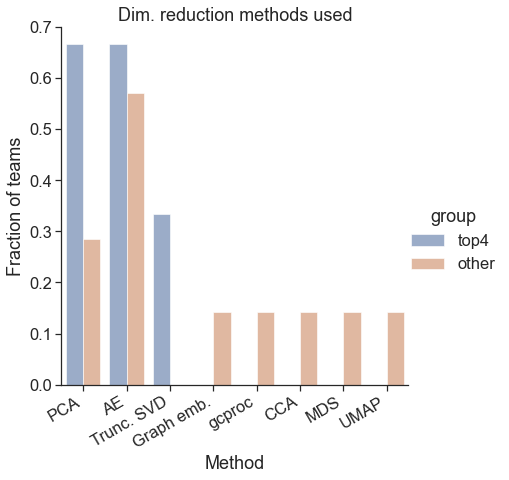

In [311]:
sns.catplot(
    data=plot_df_all, kind="bar",
    x="method", y="use_count", hue="group",
    alpha=.6, height=6)

plt.title('Dim. reduction methods used')
plt.ylabel('Fraction of teams')
plt.xlabel('Method')

plt.xticks(rotation = 30, ha="right")

plt.show()

## NN model architecture

In [312]:
t3_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_Overall', 'rank_ADT', 'rank_ATAC', 'Algorithm class fixed',
       'top4', 'Param_num_only', 'Dim_red_fixed'],
      dtype='object')

In [313]:
t3_survey_results_sorted['NN model architecture']

7                                      MLP, Autoencoder
37                       I did not use a neural network
8                                           Autoencoder
18                   Multi-Relational Graph Embeddings 
31                              Variational Autoencoder
15    MLP, Autoencoder, Variational Autoencoder, Gra...
25                              Variational Autoencoder
17                       I did not use a neural network
32                              Variational Autoencoder
1                                         MLP, Graph NN
Name: NN model architecture, dtype: object

In [314]:
# get all possible values

all_vals = t3_survey_results_sorted['NN model architecture']
all_vals = [s.split(', ') for s in all_vals]
all_vals = flatten(all_vals)
all_vals = list(set(all_vals))

In [315]:
all_vals

['Multi-Relational Graph Embeddings ',
 'MLP',
 'Variational Autoencoder',
 'Autoencoder',
 'I did not use a neural network',
 'Graph NN']

In [316]:
dim_red_fix_dict = {
    
    'I did not use a neural network':'no NN used',
    'Multi-Relational Graph Embeddings ':'Graph emb.',
    'Graph NN':'Graph NN',
    'Variational Autoencoder':'VAE',
    'Autoencoder':'AE',
    'MLP':'MLP'
    
}

In [317]:
fixed_col = []

for s in t3_survey_results_sorted['NN model architecture']:
    
    s = s.split(', ')
    fixed_vals = []
    
    for s_i in s:
        fixed_vals.append(dim_red_fix_dict[s_i])
        
    fixed_col.append(fixed_vals)
    
t3_survey_results_sorted['NN_arch_fixed'] = fixed_col

In [318]:
t3_survey_results_sorted['NN_arch_fixed']

7                    [MLP, AE]
37                [no NN used]
8                         [AE]
18                [Graph emb.]
31                       [VAE]
15    [MLP, AE, VAE, Graph NN]
25                       [VAE]
17                [no NN used]
32                       [VAE]
1              [MLP, Graph NN]
Name: NN_arch_fixed, dtype: object

In [325]:
t3_survey_results_sorted_top = t3_survey_results_sorted.loc[t3_survey_results_sorted['top4']=='top4',:]

In [326]:
t3_survey_results_sorted_other = t3_survey_results_sorted.loc[t3_survey_results_sorted['top4']!='top4',:]

top df

In [327]:
dim_res_top = t3_survey_results_sorted_top['NN_arch_fixed']
dim_res_top = flatten(dim_res_top)
dim_res_top = dict(Counter(dim_res_top))

In [328]:
plot_df = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [329]:
plot_df.loc[:,'method'] = list(dim_res_top.keys())
plot_df.loc[:,'use_count'] = list(dim_res_top.values())
plot_df.loc[:,'use_count'] = plot_df.loc[:,'use_count'] / t3_survey_results_sorted_top.shape[0]
plot_df.loc[:,'group'] = 'top'

In [330]:
plot_df

method  use_count group
0         MLP   0.333333   top
1          AE   0.666667   top
2  no NN used   0.333333   top

Other df

In [331]:
dim_res_other = t3_survey_results_sorted_other['NN_arch_fixed']
dim_res_other = flatten(dim_res_other)
dim_res_other = dict(Counter(dim_res_other))

In [332]:
plot_df_other = pd.DataFrame(columns=['method', 'use_count', 'group'])

In [333]:
plot_df_other.loc[:,'method'] = list(dim_res_other.keys())
plot_df_other.loc[:,'use_count'] = list(dim_res_other.values())
plot_df_other.loc[:,'use_count'] = plot_df_other.loc[:,'use_count'] / t3_survey_results_sorted_other.shape[0]
plot_df_other.loc[:,'group'] = 'other(9)'

In [334]:
plot_df_all = pd.concat([plot_df, plot_df_other])

In [335]:
plot_df_all

method  use_count     group
0         MLP   0.333333       top
1          AE   0.666667       top
2  no NN used   0.333333       top
0  Graph emb.   0.142857  other(9)
1         VAE   0.571429  other(9)
2         MLP   0.285714  other(9)
3          AE   0.142857  other(9)
4    Graph NN   0.285714  other(9)
5  no NN used   0.142857  other(9)

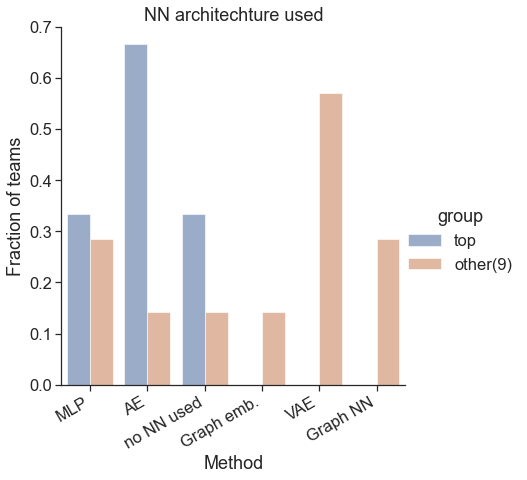

In [336]:
sns.catplot(
    data=plot_df_all, kind="bar",
    x="method", y="use_count", hue="group",
    alpha=.6, height=6)

plt.title('NN architechture used')
plt.ylabel('Fraction of teams')
plt.xlabel('Method')

plt.xticks(rotation = 30, ha="right")

plt.show()

## Model depth

In [337]:
t3_survey_results['Model depth']

1                 1-2 hidden layers
7                5-10 hidden layers
8                 1-2 hidden layers
15                1-2 hidden layers
17    No hidden layers (no NN used)
18                1-2 hidden layers
25               5-10 hidden layers
31                3-5 hidden layers
32                10+ hidden layers
37    No hidden layers (no NN used)
Name: Model depth, dtype: object

In [338]:
t3_survey_results['Model depth'].value_counts()

1-2 hidden layers                4
5-10 hidden layers               2
No hidden layers (no NN used)    2
3-5 hidden layers                1
10+ hidden layers                1
Name: Model depth, dtype: int64

### Per subtask

In [339]:
col_name = 'Model depth'
t3_survey_results[col_name].value_counts()

1-2 hidden layers                4
5-10 hidden layers               2
No hidden layers (no NN used)    2
3-5 hidden layers                1
10+ hidden layers                1
Name: Model depth, dtype: int64

In [340]:
fix_dict = {
    'No hidden layers (no NN used)':'no NN used',
    '1-2 hidden layers':'1-2 hidden layers',
    '3-5 hidden layers':'3-5 hidden layers',
    '5-10 hidden layers':'5-10 hidden layers',
    '10+ hidden layers':'10+ hidden layer'
}

In [341]:
t3_survey_results[col_name+'_fixed'] = t3_survey_results[col_name].map(fix_dict)

/var/folders/vx/p0kclf654ql9cy9txc6rtdfsgpr29k/T/ipykernel_27084/1504255934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t3_survey_results[col_name+'_fixed'] = t3_survey_results[col_name].map(fix_dict)


In [342]:
#classes = list(set(flatten(list(t1_survey_results[col_name]))))
classes = list(t3_survey_results[col_name+'_fixed'].unique())
classes

['1-2 hidden layers',
 '5-10 hidden layers',
 'no NN used',
 '3-5 hidden layers',
 '10+ hidden layer']

In [343]:
classes = ['no NN used',
           '1-2 hidden layers',
           '3-5 hidden layers',
           '5-10 hidden layers',
           '10+ hidden layer']

In [344]:
subtask_list = ['arithmetic_mean', 'arithmetic_mean_ADT', 'arithmetic_mean_ATAC']

In [345]:
t3_survey_results[col_name+'_fixed']

1      1-2 hidden layers
7     5-10 hidden layers
8      1-2 hidden layers
15     1-2 hidden layers
17            no NN used
18     1-2 hidden layers
25    5-10 hidden layers
31     3-5 hidden layers
32      10+ hidden layer
37            no NN used
Name: Model depth_fixed, dtype: object

In [346]:
feature

'2: Non-linear combination of input features in a shallow architecture'

In [347]:
feature

'2: Non-linear combination of input features in a shallow architecture'

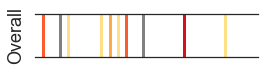

no NN used
P value (U-test): 0.889
1-2 hidden layers
P value (U-test): 0.914
3-5 hidden layers
P value (U-test): 1.0
5-10 hidden layers
P value (U-test): 0.533
10+ hidden layer
P value (U-test): 0.4


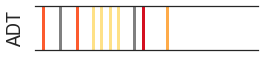

no NN used
P value (U-test): 0.889
1-2 hidden layers
P value (U-test): 1.0
3-5 hidden layers
P value (U-test): 0.2
5-10 hidden layers
P value (U-test): 0.089
10+ hidden layer
P value (U-test): 0.4


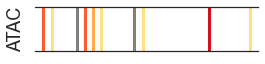

no NN used
P value (U-test): 0.889
1-2 hidden layers
P value (U-test): 0.476
3-5 hidden layers
P value (U-test): 1.0
5-10 hidden layers
P value (U-test): 0.178
10+ hidden layer
P value (U-test): 0.4


In [348]:
for subtask in subtask_list:

    rank_list = globals()['t3_team_ranks_'+task_dict[subtask]]

    vals = np.array(rank_list[subtask])
    #vals = vals[vals<0.7]

    plt.figure(figsize=(4, 0.8))

    #plt.title(task_dict[subtask])

    #scat_plot = plt.scatter([i+1 for i in range(len(vals))], vals, c='white', edgecolors='grey', s=20, label='submission')
    #plt.grid()
    
    col_list = ['grey']+ list(sns.color_palette("YlOrRd", n_colors=len(classes)-1))
    col_list_red = col_list
    
    for feature,col in zip(classes, col_list_red):
        
        # feature of interest
        v_coords_test = t3_survey_results.loc[t3_survey_results[col_name+'_fixed']==feature, 'rank_'+task_dict[subtask]]
        #kick categories with only one data point
        if len(v_coords_test)<=1:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=3, label=feature)
        
        else:
            
            lines_leg = plt.axvline(v_coords_test.values[0], c=col, alpha=1,linewidth=3, label=feature)
            for x in v_coords_test[1:]:
                lines_test = plt.axvline(x, c=col, alpha=1, linewidth=3)

    # # feature of interest
    # v_coords_test = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']==feature, 'rank_'+subtask]
    # for x in v_coords_test:
    #     lines_test = plt.axvline(x, c='r', alpha=1)
    # 
    # # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    # 
    #  # all other features
    # v_coords_contr = t1_survey_results.loc[t1_survey_results['Algorithm class fixed']!=feature, 'rank_'+subtask]
    # for x in v_coords_contr:
    #     lines_contr = plt.axvline(x, c='b', alpha=1)
    
    plt.xlim(0,27)

    plt.ylabel(task_dict[subtask])
    #plt.xlabel('Rank')

    plt.yticks([])
    plt.xticks([])

    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(False)

    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    #plt.legend(title="NN depth",loc='center left', bbox_to_anchor=(1, 0.5)) 

    #plt.xticks(rotation=90)
    #plt.savefig('figures/t3_depth_by_rank_'+subtask+'_withlegend.pdf', bbox_inches='tight')
    plt.savefig('figures/t3_depth_by_rank_'+subtask+'.pdf', bbox_inches='tight')

    plt.show()
    
    for feature in classes:
        
        
        v_coords_test = t3_survey_results.loc[t3_survey_results[col_name+'_fixed']==feature, 'rank_'+task_dict[subtask]]
        v_coords_contr = t3_survey_results.loc[t3_survey_results[col_name+'_fixed']!=feature, 'rank_'+task_dict[subtask]]
        
        print(feature)
        print('P value (U-test):', round(stats.mannwhitneyu(v_coords_test, v_coords_contr)[1],3))
    
    

In [349]:
v_coords_contr

1     26
7      1
8      2
15    13
17    12
18     8
25     6
31     7
37     5
Name: rank_ATAC, dtype: int64

## Variation in latent space

In [350]:
t3_survey_results_sorted.columns

Index(['Timestamp', 'First name', 'Last name', 'Team', 'Email',
       'Participated tasks', 'General positive', 'General negative',
       'Future data usage', 'Survey task', 'Lessons learned',
       'Algorithm class', 'Number of parameters', 'SC analysis toolkit',
       'Public data usage', 'Dim reduction approach', 'NN model architecture',
       'Model depth', 'Deep learning framework', 'Variation in latent space',
       'Contribution', '1-page', 'Other comments', 'Authorship info',
       'rank_Overall', 'rank_ADT', 'rank_ATAC', 'Algorithm class fixed',
       'top4', 'Param_num_only', 'Dim_red_fixed', 'NN_arch_fixed'],
      dtype='object')

In [351]:
t3_survey_results_sorted['Variation in latent space']

7     2: Non-linear combination of input features in...
37    3: Linear dimensionality reduction, directly m...
8     1: Non-linear combinations of all input featur...
18    2: Non-linear combination of input features in...
31    2: Non-linear combination of input features in...
15    1: Non-linear combinations of all input featur...
25    1: Non-linear combinations of all input featur...
17            4: Latent space is made of input features
32    1: Non-linear combinations of all input featur...
1     2: Non-linear combination of input features in...
Name: Variation in latent space, dtype: object

In [352]:
t3_survey_results['Variation in latent space'].value_counts()

2: Non-linear combination of input features in a shallow architecture      4
1: Non-linear combinations of all input features in a deep architecture    4
4: Latent space is made of input features                                  1
3: Linear dimensionality reduction, directly mappable to input features    1
Name: Variation in latent space, dtype: int64

In [361]:
catego_plot_df = pd.crosstab(t3_survey_results_sorted['top4'], t3_survey_results_sorted['Variation in latent space'])

In [362]:
catego_plot_df = catego_plot_df.sort_index(ascending=False)

In [363]:
catego_plot_df

Variation in latent space  1: Non-linear combinations of all input features in a deep architecture  \
top4                                                                                                 
top4                                                                       1                         
other                                                                      3                         

Variation in latent space  2: Non-linear combination of input features in a shallow architecture  \
top4                                                                                               
top4                                                                       1                       
other                                                                      3                       

Variation in latent space  3: Linear dimensionality reduction, directly mappable to input features  
top4                                                                                                
top4                                                                       1                        
other                                                                      0

In [365]:
catego_plot_df.loc['top4',:]

Variation in latent space
1: Non-linear combinations of all input features in a deep architecture    1
2: Non-linear combination of input features in a shallow architecture      1
3: Linear dimensionality reduction, directly mappable to input features    1
Name: top4, dtype: int64

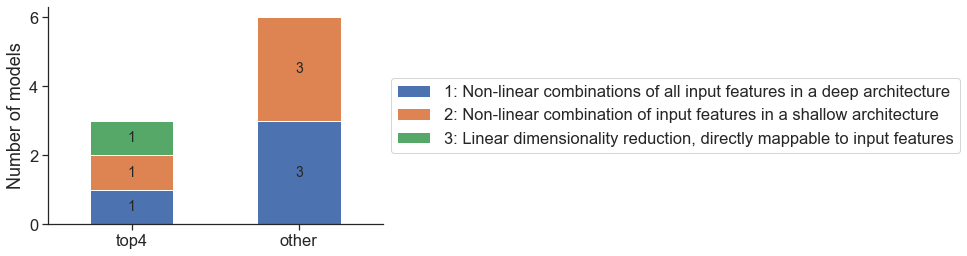

In [368]:
g = catego_plot_df.plot(kind='bar', stacked=True, rot=0)

plt.ylabel('Number of models', size=18)
plt.xlabel('')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#loop to add the text
list_values = (list(catego_plot_df.loc[:,"1: Non-linear combinations of all input features in a deep architecture"])+
               list(catego_plot_df.loc[:,"2: Non-linear combination of input features in a shallow architecture"])+
               list(catego_plot_df.loc[:,"3: Linear dimensionality reduction, directly mappable to input features"])
               #list(catego_plot_df.loc[:,"4: Latent space is made of input features"])
               #list(catego_plot_df.loc[:,"Other: I didn't use a latent space"])
              )

for rect, value in zip(g.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    if h!=0:
        g.text(x+w, y+h, value, horizontalalignment='center',verticalalignment='center', fontsize=14)


plt.show()

# Metric evaluation - RMSE versus correlation

In [369]:
os.getcwd()

'/Users/christopher.lance/PhD/projects/Neurips/PMLR_paper/NeurIPS21_comp_paper_reproducibility'

In [370]:
sub_files = glob.glob('data/submission_summaries/submission_*/output/evaluation/predict_modality/output.final_scores.output_summary.tsv')

In [371]:
sub_files[0]

'data/submission_summaries/submission_170745/output/evaluation/predict_modality/output.final_scores.output_summary.tsv'

In [372]:
res_table = pd.read_table(sub_files[0])

In [373]:
res_table

method_id               metric_id dataset_subtask      mean       var
0     c_team          correct_format         ADT2GEX  1.000000       NaN
1     c_team          correct_format        ATAC2GEX  1.000000       NaN
2     c_team          correct_format         GEX2ADT  1.000000       NaN
3     c_team          correct_format        GEX2ATAC  1.000000       NaN
4     c_team          correct_format         Overall  1.000000  0.000000
5     c_team                finished         ADT2GEX  1.000000       NaN
6     c_team                finished        ATAC2GEX  1.000000       NaN
7     c_team                finished         GEX2ADT  1.000000       NaN
8     c_team                finished        GEX2ATAC  1.000000       NaN
9     c_team                finished         Overall  1.000000  0.000000
10    c_team                     mae         ADT2GEX  0.151650       NaN
11    c_team                     mae        ATAC2GEX  0.098682       NaN
12    c_team                     mae         GEX2ADT  0.868007       NaN
13    c_team                     mae        GEX2ATAC  0.036790       NaN
14    c_team                     mae         Overall  0.288782  0.151315
15    c_team   mean_pearson_per_cell         ADT2GEX  0.000000       NaN
16    c_team   mean_pearson_per_cell        ATAC2GEX  0.415714       NaN
17    c_team   mean_pearson_per_cell         GEX2ADT  0.000000       NaN
18    c_team   mean_pearson_per_cell        GEX2ATAC  0.000000       NaN
19    c_team   mean_pearson_per_cell         Overall  0.103928  0.043204
20    c_team   mean_pearson_per_gene         ADT2GEX  0.000000       NaN
21    c_team   mean_pearson_per_gene        ATAC2GEX  0.085044       NaN
22    c_team   mean_pearson_per_gene         GEX2ADT  0.000000       NaN
23    c_team   mean_pearson_per_gene        GEX2ATAC  0.000000       NaN
24    c_team   mean_pearson_per_gene         Overall  0.021261  0.001808
25    c_team  mean_spearman_per_cell         ADT2GEX  0.000000       NaN
26    c_team  mean_spearman_per_cell        ATAC2GEX  0.250436       NaN
27    c_team  mean_spearman_per_cell         GEX2ADT  0.000000       NaN
28    c_team  mean_spearman_per_cell        GEX2ATAC  0.000000       NaN
29    c_team  mean_spearman_per_cell         Overall  0.062609  0.015680
30    c_team  mean_spearman_per_gene         ADT2GEX  0.000000       NaN
31    c_team  mean_spearman_per_gene        ATAC2GEX  0.097310       NaN
32    c_team  mean_spearman_per_gene         GEX2ADT  0.000000       NaN
33    c_team  mean_spearman_per_gene        GEX2ATAC  0.000000       NaN
34    c_team  mean_spearman_per_gene         Overall  0.024328  0.002367
35    c_team         overall_pearson         ADT2GEX -1.000000       NaN
36    c_team         overall_pearson        ATAC2GEX  0.406904       NaN
37    c_team         overall_pearson         GEX2ADT -1.000000       NaN
38    c_team         overall_pearson        GEX2ATAC -1.000000       NaN
39    c_team         overall_pearson         Overall -0.648274  0.494845
40    c_team        overall_spearman         ADT2GEX -1.000000       NaN
41    c_team        overall_spearman        ATAC2GEX  0.260326       NaN
42    c_team        overall_spearman         GEX2ADT -1.000000       NaN
43    c_team        overall_spearman        GEX2ATAC -1.000000       NaN
44    c_team        overall_spearman         Overall -0.684918  0.397106
45    c_team                    rmse         ADT2GEX  0.505132       NaN
46    c_team                    rmse        ATAC2GEX  0.240602       NaN
47    c_team                    rmse         GEX2ADT  1.186988       NaN
48    c_team                    rmse        GEX2ATAC  0.191807       NaN
49    c_team                    rmse         Overall  0.531132  0.210124

In [374]:
list(res_table.dataset_subtask.unique())

['ADT2GEX', 'ATAC2GEX', 'GEX2ADT', 'GEX2ATAC', 'Overall']

In [375]:
subtask_list = ['ADT2GEX', 'ATAC2GEX', 'GEX2ADT', 'GEX2ATAC', 'Overall']
metric_id_list = ['overall_pearson', 'overall_spearman', 'rmse']

In [376]:
rmse_dict = {}
pearson_dict = {}
spearman_dict = {}

# init dicts
for t in subtask_list:
    rmse_dict[t] = []
    pearson_dict[t] = []
    spearman_dict[t] = []
    

for name in sub_files:
    
    res_table = pd.read_table(name)
    sub_dict = {}
    
    for t in subtask_list:
        
        rmse_val = res_table.loc[res_table.dataset_subtask==t, :]
        rmse_val = rmse_val.loc[rmse_val.metric_id=='rmse', 'mean'].values
        
        pear_val = res_table.loc[res_table.dataset_subtask==t, :]
        pear_val = pear_val.loc[pear_val.metric_id=='overall_pearson', 'mean'].values
        
        spear_val = res_table.loc[res_table.dataset_subtask==t, :]
        spear_val = spear_val.loc[spear_val.metric_id=='overall_spearman', 'mean'].values
        
        sub_dict[t] = {'rmse':rmse_val, 'pear':pear_val, 'spear':spear_val}
    
    for t in subtask_list:
        rmse_dict[t] = list(rmse_dict[t]) + list(sub_dict[t]['rmse'])
        pearson_dict[t] = list(pearson_dict[t]) + list(sub_dict[t]['pear'])
        spearman_dict[t] = list(spearman_dict[t]) + list(sub_dict[t]['spear'])



In [377]:
rmse_scores = rmse_dict['Overall']
pear_scores = pearson_dict['Overall']
spear_scores = spearman_dict['Overall']

In [378]:
plot_df = pd.DataFrame(columns = ['rmse', 'pear', 'spear'])

In [379]:
plot_df['rmse'] = rmse_dict['Overall']
plot_df['pear'] = pearson_dict['Overall']
plot_df['spear'] = spearman_dict['Overall']

$R^2$: 0.6853836541905345


/Users/christopher.lance/miniconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


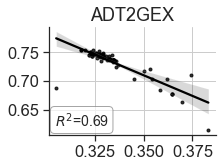

$R^2$: 0.15406307208161343


/Users/christopher.lance/miniconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


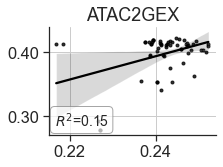

$R^2$: 0.7621805932586022


/Users/christopher.lance/miniconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


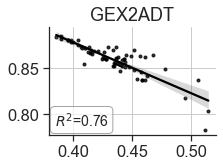

$R^2$: 0.3251010949065241


/Users/christopher.lance/miniconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


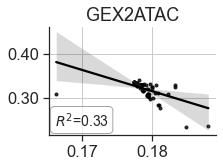

$R^2$: 0.7929744553581868


/Users/christopher.lance/miniconda3/envs/mm_best_muon_full/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


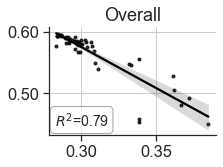

In [380]:
for t in subtask_list:
    
    plot_df = pd.DataFrame(columns = ['rmse', 'pear', 'spear'])
    
    plot_df['rmse'] = rmse_dict[t]
    plot_df['pear'] = pearson_dict[t]
    plot_df['spear'] = spearman_dict[t]
    
    plot_df_red = plot_df.loc[plot_df['rmse']<1,:]
    plot_df_red = plot_df_red.loc[plot_df_red['rmse'] < np.quantile(plot_df_red['rmse'], 0.9),:]
    plot_df_red = plot_df_red.loc[plot_df_red['pear'] > 0.1,:]
    
    s,i,r,p,ste = stats.linregress(plot_df_red['rmse'],plot_df_red['pear'])
    print("$R^2$:", r**2)
    
    plt.figure(figsize=(3, 2))
    
    #plot_df_red.plot.scatter('rmse', 'pear', c='grey', edgecolors='black')
    fig = sns.regplot(plot_df_red.rmse, plot_df_red.pear, ci=90, color='black', marker='.')
    plt.grid()
    #plt.xlabel('RMSE')
    #plt.ylabel("Pearson's R")
    plt.xlabel('')
    plt.ylabel("")
    plt.title(t)
    
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    #fig.axes.annotate("$R^2$="+str(round( r**2 , 2))+"\n$s;se$="+str(round(s,1))+'\u00B1'+str(round(ste,1)), xy=(0, 0), xycoords='axes fraction',
    #                  xytext=(6,6), textcoords='offset points', fontsize=12,
    #                  ha='left', va='bottom',
    #                  bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', alpha=0.8))
    #
    fig.axes.annotate("$R^2$="+str(round( r**2 , 2)), xy=(0, 0), xycoords='axes fraction',
                      xytext=(6,6), textcoords='offset points', fontsize=14,
                      ha='left', va='bottom',
                      bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', alpha=0.7))
    
    
    plt.savefig('figures/t1_rmse_cor_'+t+'.pdf', bbox_inches='tight')
    plt.show()
    

   

In [381]:
fig.axes.transAxes

# Stochastic effect of metrics

In [382]:
t1_submissions_filtered = t1_submissions.loc[t1_submissions.Overall < 0.35]

In [383]:
dance_results = [0.2881, 0.2914, 0.287, 0.2824]
legend_loc = 0.287

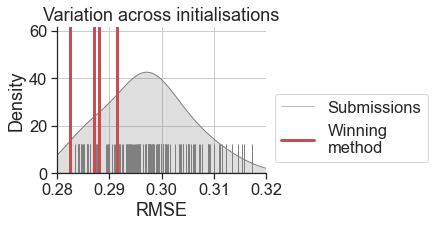

In [384]:
sns.displot(t1_submissions_filtered, x="Overall", kind="kde", fill=True,
            height=3, aspect=1.3, color='grey', rug=True, rug_kws=dict(height=0.2))

plt.xlim(0.28, 0.32)

plt.axvline(x=x, c='grey', linewidth=0.5, label='Submissions', ymax=0.2)

plt.axvline(x=x, c='r', linewidth=3, label='Winning\nmethod')
for x in dance_results:
    plt.axvline(x=x, c='r', linewidth=3)

plt.grid()

plt.legend(bbox_to_anchor=(1, 0.6))

plt.title('Variation across initialisations')
plt.xlabel('RMSE')

plt.savefig('figures/dance_inits.pdf', bbox_inches='tight')